In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/work/adverts.csv'
adv = pd.read_csv(file_path)

In [4]:
adv.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
8,202010014442611,111236.0,08,Black,Mercedes-Benz,S Class,USED,2008.0,6995,Limousine,False,Diesel
9,202006230431327,9500.0,19,White,Land Rover,Range Rover,USED,2019.0,79995,SUV,False,Diesel


In [5]:
adv.tail(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
401995,202010305624221,53460.0,10,Blue,SEAT,Ibiza,USED,2010.0,3795,Estate,False,Petrol
401996,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol
401997,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol
401998,202010315649743,87078.0,53,Green,Honda,Jazz,USED,2003.0,995,Hatchback,False,Petrol
401999,202010315651841,74732.0,59,Blue,Toyota,Auris,USED,2009.0,2600,Hatchback,False,Petrol
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [6]:
# Renaming the columns
adv.rename(columns={'standard_colour': 'std_colour', 'standard_make': 'std_make', 'standard_model': 'std_model', 'year_of_registration': 'year_of_reg', 'crossover_car_and_van': 'co_car_and_van'}, inplace=True)

In [7]:
adv.sample(30)

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
175647,202009254205715,0.0,NaN,Silver,Mitsubishi,Outlander,NEW,NaN,38995,SUV,False,Petrol Plug-in Hybrid
382137,202008102318933,33000.0,16,White,BMW,i3,USED,2016.0,16290,Hatchback,False,Petrol Hybrid
92748,202007020762009,0.0,NaN,Silver,Mitsubishi,Outlander,NEW,NaN,33600,SUV,False,Petrol Plug-in Hybrid
293145,202008293069120,65569.0,12,Black,Audi,Q3,USED,2012.0,11250,SUV,False,Diesel
356196,202009294344935,87000.0,09,Black,Audi,A5,USED,2009.0,7150,Coupe,False,Petrol
81277,202010124921950,109000.0,61,Black,Land Rover,Range Rover Sport,USED,2012.0,12850,SUV,False,Diesel
220175,202010175107860,76222.0,60,Black,Citroen,C3 Picasso,USED,2010.0,3120,MPV,False,Diesel
83357,202010305612048,35600.0,16,Grey,Land Rover,Range Rover Evoque,USED,2016.0,23986,SUV,False,Diesel
281031,202010205220283,45000.0,15,Blue,SEAT,Ibiza,USED,2015.0,5350,Hatchback,False,Petrol
303642,202010155022931,24887.0,66,White,BMW,3 Series,USED,2016.0,17695,Estate,False,Diesel


In [8]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   public_reference   402005 non-null  int64  
 1   mileage            401878 non-null  float64
 2   reg_code           370148 non-null  object 
 3   std_colour         396627 non-null  object 
 4   std_make           402005 non-null  object 
 5   std_model          402005 non-null  object 
 6   vehicle_condition  402005 non-null  object 
 7   year_of_reg        368694 non-null  float64
 8   price              402005 non-null  int64  
 9   body_type          401168 non-null  object 
 10  co_car_and_van     402005 non-null  bool   
 11  fuel_type          401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [9]:
len(adv)

402005

In [10]:
adv.shape

(402005, 12)

In [11]:
adv.columns

Index(['public_reference', 'mileage', 'reg_code', 'std_colour', 'std_make',
       'std_model', 'vehicle_condition', 'year_of_reg', 'price', 'body_type',
       'co_car_and_van', 'fuel_type'],
      dtype='object')

In [12]:
adv.describe()

,public_reference,mileage,year_of_reg,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [13]:
adv.isnull().sum()

public_reference         0
mileage                127
reg_code             31857
std_colour            5378
std_make                 0
std_model                0
vehicle_condition        0
year_of_reg          33311
price                    0
body_type              837
co_car_and_van           0
fuel_type              601
dtype: int64

In [14]:
adv.duplicated().sum()

0

In [15]:
adv['price'].value_counts().sort_index(ascending=False).head(60)

9999999    6
3799995    1
2850000    1
2695000    1
2500000    1
2400000    1
2299950    1
2195000    1
2150000    2
2049950    1
1950000    1
1699995    1
1590000    1
1400000    1
1395000    2
1350000    2
1295000    1
1200000    3
1100000    1
1099950    1
1050000    1
1000000    1
999999     3
999975     1
980000     1
969990     1
965000     1
950000     2
949950     1
899000     1
895000     1
888000     1
884995     1
850000     1
844995     1
815000     1
799995     2
799990     1
799900     2
799850     1
795000     1
790000     1
750000     2
749995     1
725000     1
724995     1
699995     1
699950     1
699900     2
684990     1
675000     1
674995     1
650000     1
649995     1
649950     2
649850     1
635000     1
629990     1
625000     1
624995     1
Name: price, dtype: int64

In [16]:
adv['price'].value_counts().sort_index(ascending=False).tail(30)

449     1
425     5
420     1
400    11
399     2
395    16
390    12
389     1
380     1
375     1
354     1
350    22
345     1
325     2
310     1
300    15
299     1
298     1
295     7
290     2
279     1
258     1
250    10
240     1
225     1
200     3
180     1
150     1
122     1
120     1
Name: price, dtype: int64

In [17]:
adv['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

In [18]:
adv['price'].value_counts()

8995     2432
7995     2377
6995     2369
9995     2340
5995     2249
         ... 
16253       1
44150       1
50340       1
76989       1
58987       1
Name: price, Length: 30578, dtype: int64

<Axes: xlabel='price', ylabel='Density'>

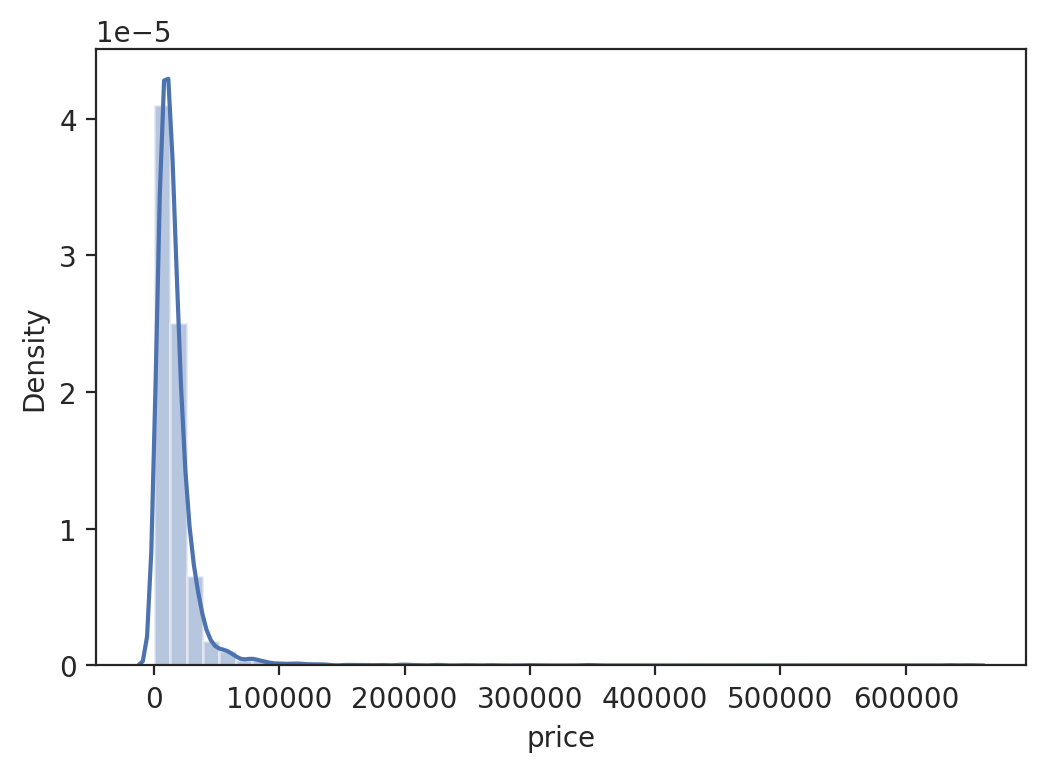

In [19]:
sns.distplot(adv['price'].sample(5000))

In [20]:
adv['price'].value_counts().head(60)

8995     2432
7995     2377
6995     2369
9995     2340
5995     2249
4995     2079
10995    2054
11995    1931
3995     1877
12995    1853
12000    1746
13995    1715
10000    1684
9000     1624
14995    1584
6495     1564
11000    1542
2995     1535
13000    1514
9500     1503
8495     1494
7495     1493
1995     1478
16995    1391
14000    1391
8000     1380
15995    1365
5495     1348
15000    1345
11500    1323
12500    1317
3495     1257
9495     1242
13500    1231
4495     1223
19995    1217
16000    1212
8500     1202
10500    1198
7000     1170
17995    1167
10495    1160
18995    1156
7500     1114
12495    1103
17000    1102
11495    1093
2495     1060
18000    1032
6500      991
1495      953
8990      952
13495     948
14500     946
16500     942
6990      942
6000      940
9990      929
7990      915
19000     905
Name: price, dtype: int64

In [21]:
adv['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [22]:
adv['mileage'].value_counts()

0.0        16207
10.0       12873
5.0         2434
60000.0     1609
50000.0     1580
           ...  
53660.0        1
72993.0        1
74437.0        1
66881.0        1
53460.0        1
Name: mileage, Length: 80634, dtype: int64

<Axes: xlabel='mileage', ylabel='Density'>

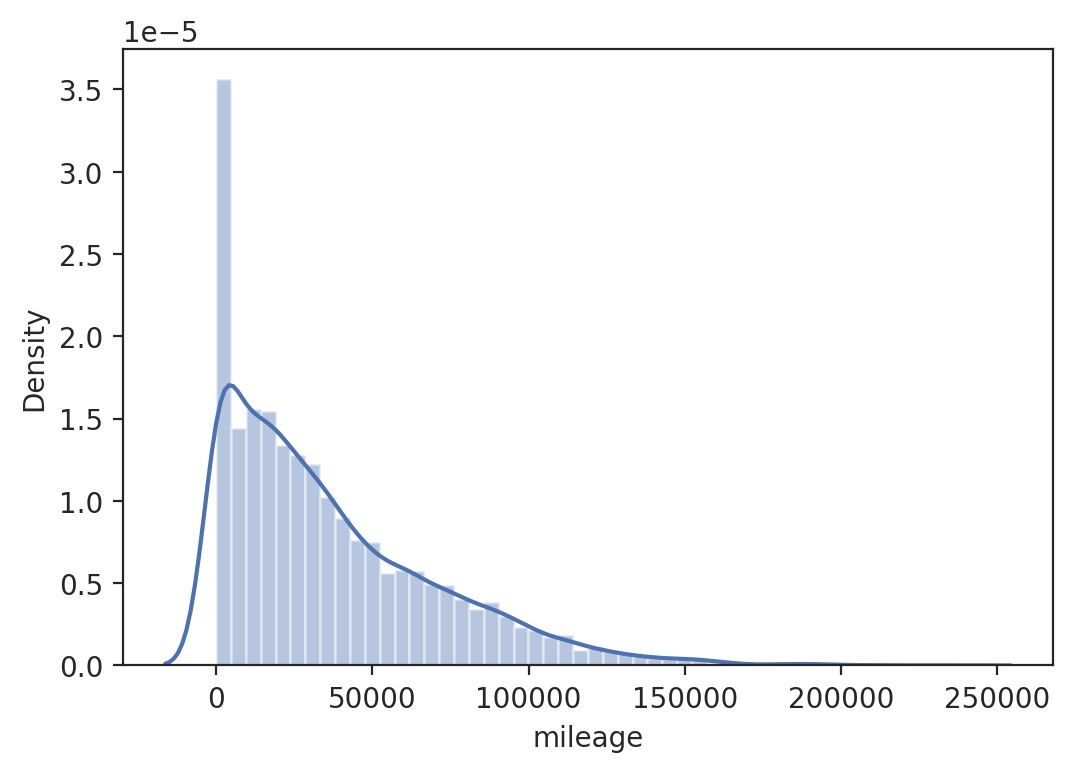

In [23]:
sns.distplot(adv['mileage'].sample(10000))

In [24]:
adv['year_of_reg'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_reg, dtype: float64

In [25]:
adv['year_of_reg'].value_counts()

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1010.0        1
1934.0        1
1016.0        1
1063.0        1
1015.0        1
Name: year_of_reg, Length: 84, dtype: int64

<Axes: xlabel='year_of_reg', ylabel='Density'>

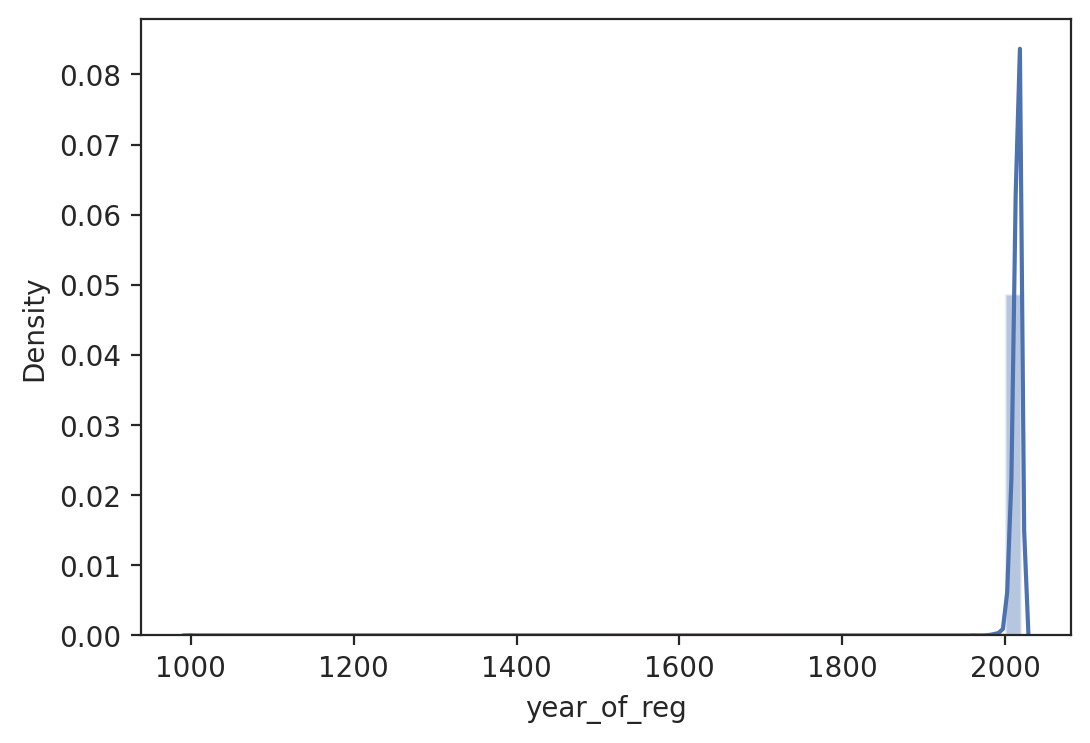

In [26]:
sns.distplot(adv['year_of_reg'].sample(5000))

In [27]:
adv['year_of_reg'].value_counts().sum()

368694

In [28]:
adv['year_of_reg'].value_counts().tail(24)

1960.0    5
1957.0    5
1954.0    4
1007.0    3
1955.0    3
1956.0    3
1959.0    3
1958.0    3
999.0     3
1009.0    2
1952.0    2
1933.0    2
1515.0    1
1008.0    1
1006.0    1
1017.0    1
1018.0    1
1909.0    1
1950.0    1
1010.0    1
1934.0    1
1016.0    1
1063.0    1
1015.0    1
Name: year_of_reg, dtype: int64

In [29]:
# Dropping the rows with values 999 to 1903 in the year_of_reg column because
# the first car registration was in 1903, so it is not possible for a car to be
# registered before then.
adv = adv.drop(adv[adv['year_of_reg'].between(999,1903)].index)

In [30]:
adv['year_of_reg'].value_counts().sum()

368677

In [31]:
adv['year_of_reg'].min()

1909.0

In [32]:
adv['year_of_reg'].isna().sum()

33311

Replacing missing values

In [33]:

adv["mileage"] = adv["mileage"].fillna(adv["mileage"].mean().round(0))

In [34]:
adv["year_of_reg"] = adv["year_of_reg"].fillna(adv["year_of_reg"].mean().round(0))

In [35]:
adv["fuel_type"] = adv["fuel_type"].fillna(adv["fuel_type"].mode().iloc[0])

In [36]:
adv["body_type"] = adv["body_type"].fillna(adv["body_type"].mode().iloc[0])

In [37]:
adv["std_colour"] = adv["std_colour"].fillna(adv["std_colour"].mode().iloc[0])

In [38]:
adv.isnull().sum()

public_reference         0
mileage                  0
reg_code             31857
std_colour               0
std_make                 0
std_model                0
vehicle_condition        0
year_of_reg              0
price                    0
body_type                0
co_car_and_van           0
fuel_type                0
dtype: int64

In [39]:
adv['year_of_reg'].value_counts().sum()

401988

In [40]:
features_to_corr = [ 'price', 'mileage', 'year_of_reg']

<Axes: >

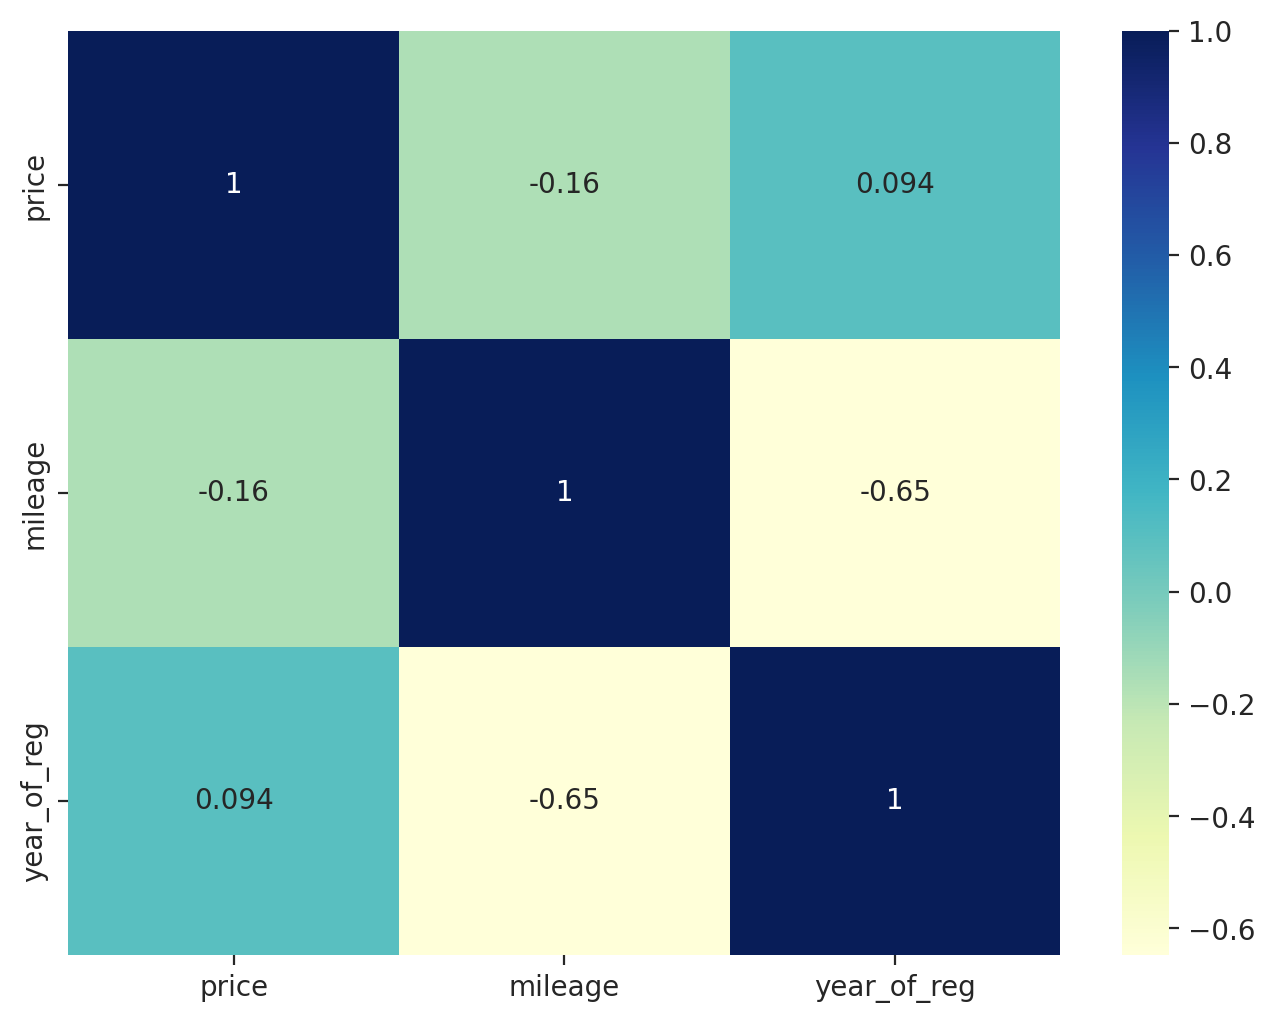

In [41]:
# A correlational heatmap of price, mileage and year_of_reg to
# provide a visual representation of the correlation between them
plt.subplots(figsize=(8,6))
sns.heatmap(adv[features_to_corr].corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='year_of_reg', ylabel='price'>

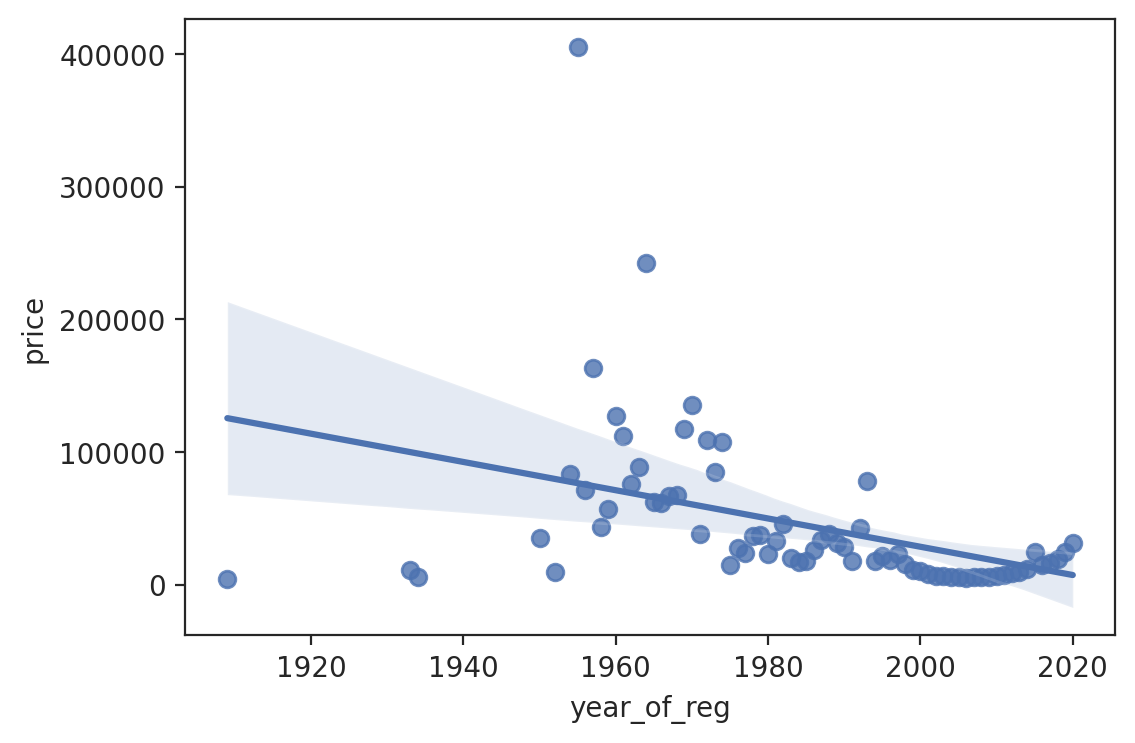

In [42]:
# Calculating the average price per year
avg_price_per_year = adv.groupby('year_of_reg')['price'].mean().reset_index()

# A regplot of year of registration vs price to provide
#further visualisation the of the relationship between price and
# year of registration.
sns.regplot(data=avg_price_per_year, x='year_of_reg', y='price')

In [43]:
adv[adv['year_of_reg'].between(1958,1960)]

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
130071,202009254190502,1000.0,NaN,Black,Porsche,356,USED,1960.0,250000,Coupe,False,Petrol
144817,201910253690150,76000.0,NaN,White,Cadillac,De Ville,USED,1959.0,39990,Hatchback,False,Petrol
181697,202010195193032,95000.0,NaN,Green,Land Rover,Series II,USED,1958.0,5995,Hatchback,False,Petrol
235366,202008222814336,1.0,NaN,Red,Jaguar,XK150,USED,1959.0,109995,Convertible,False,Petrol
272516,202009133674279,50100.0,NaN,Green,Land Rover,Series II,USED,1960.0,12500,Pickup,False,Petrol
303334,202010225316355,80000.0,NaN,Red,Austin,Healey,USED,1958.0,47995,Convertible,False,Petrol
340700,202010124891983,2275.0,NaN,Yellow,MG,TC,USED,1959.0,21500,Convertible,False,Petrol
342822,202010165068876,37769.0,NaN,Silver,Porsche,356,USED,1958.0,77000,Coupe,False,Petrol
361285,202010074695867,28.0,NaN,Silver,Austin,Healey,USED,1960.0,52989,Coupe,False,Petrol
379914,202010145000551,21015.0,NaN,Green,Bentley,Continental,USED,1960.0,295000,Saloon,False,Petrol


In [44]:
avg_price_per_mileage = adv.groupby('mileage')['price'].mean().reset_index()

<Axes: xlabel='mileage', ylabel='price'>

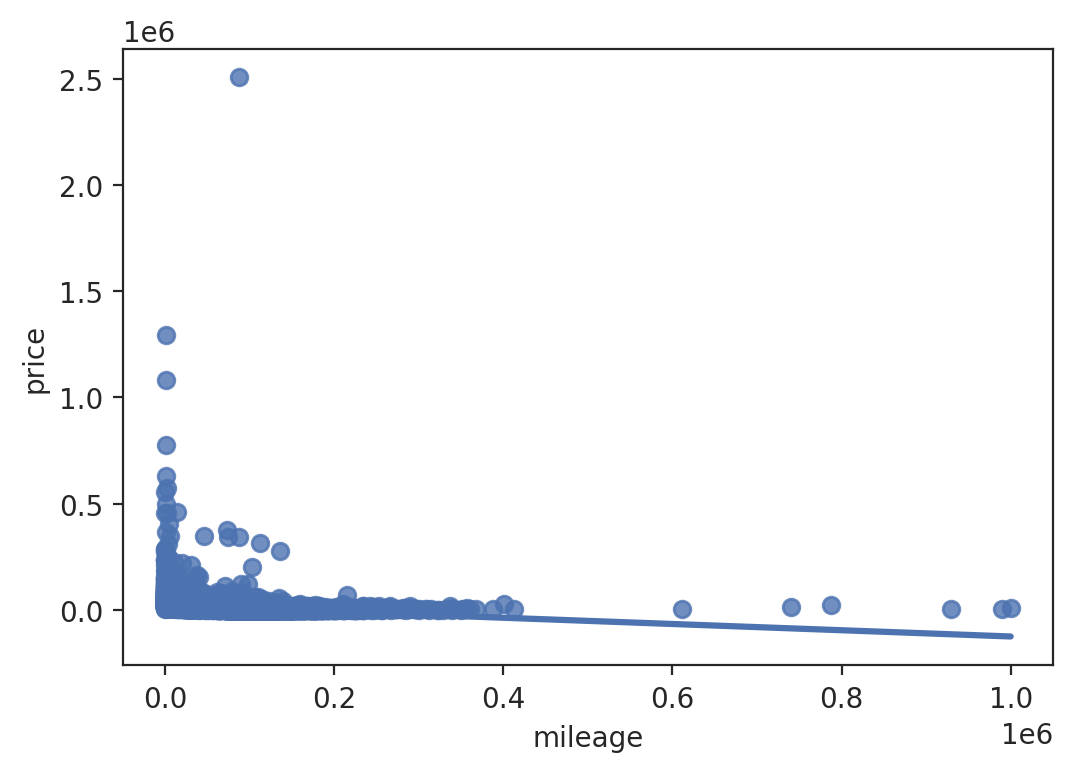

In [45]:
sns.regplot(data=avg_price_per_mileage, x='mileage', y='price')

In [46]:
adv['fuel_type'].describe()

count     401988
unique         9
top       Petrol
freq      217517
Name: fuel_type, dtype: object

In [47]:
adv['fuel_type'].value_counts()

Petrol                   217517
Diesel                   158117
Petrol Hybrid             13601
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

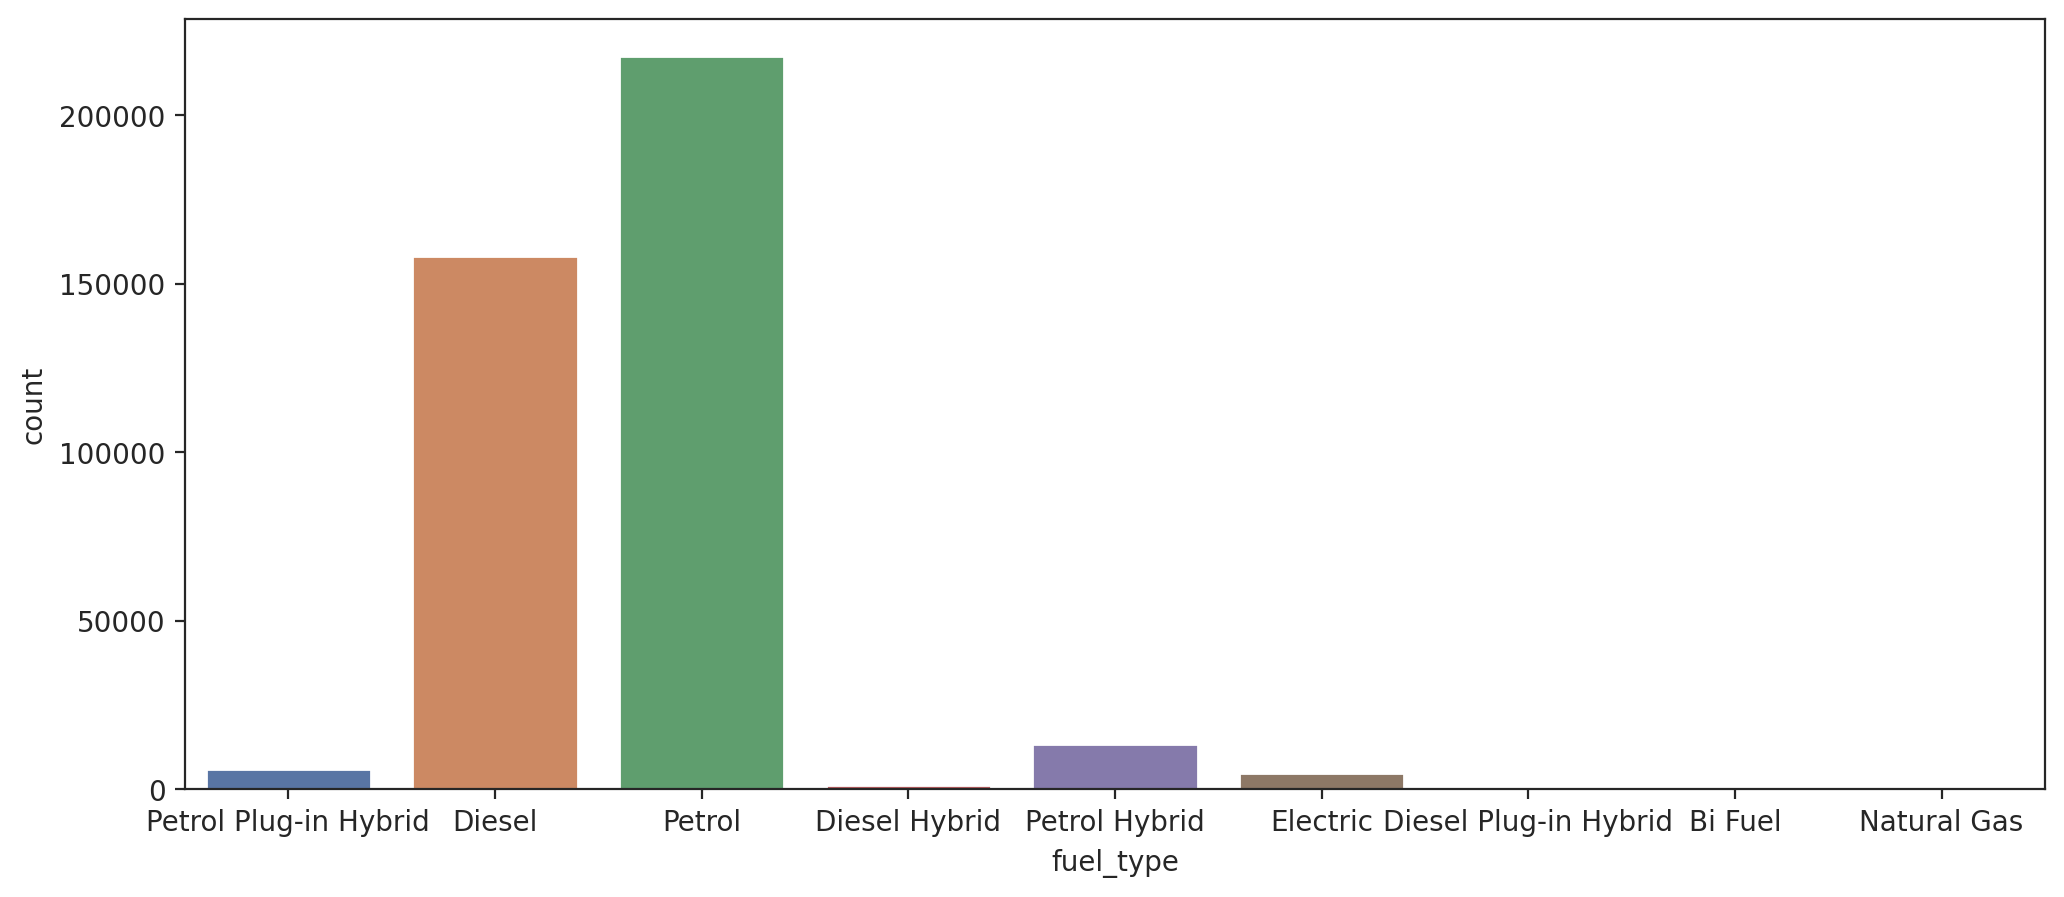

In [48]:
plt.figure(figsize=(12, 5))
sns.countplot(x='fuel_type', data=adv)


In [49]:
adv['body_type'].describe()

count        401988
unique           16
top       Hatchback
freq         168146
Name: body_type, dtype: object

In [50]:
adv['body_type'].value_counts()

Hatchback          168146
SUV                115871
Saloon              36639
Estate              24689
Coupe               23256
Convertible         16035
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

<Axes: xlabel='body_type', ylabel='count'>

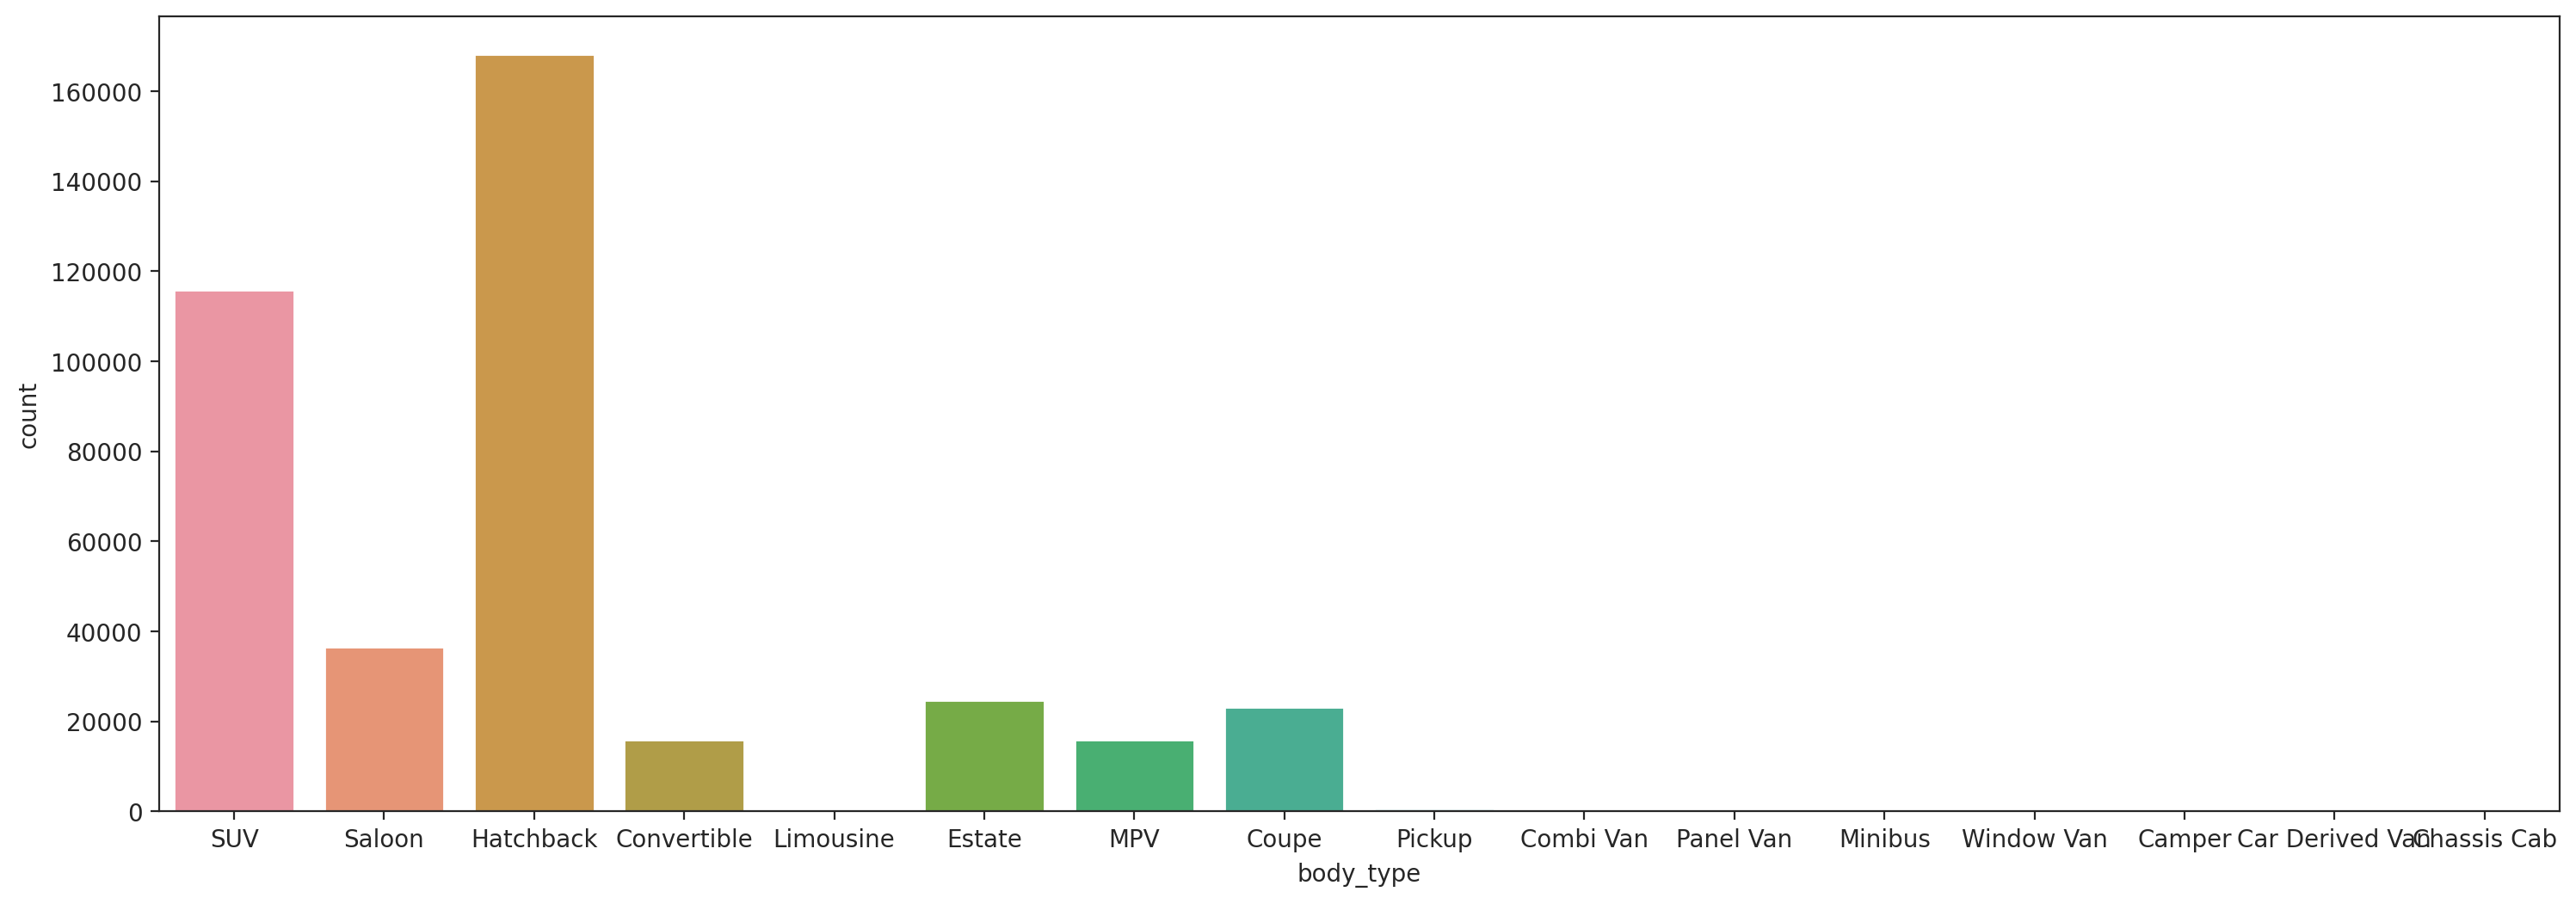

In [51]:
plt.figure(figsize=(18, 6))
sns.countplot(x='body_type', data=adv)

In [52]:
adv['std_colour'].describe()

count     401988
unique        22
top        Black
freq       91661
Name: std_colour, dtype: object

In [53]:
adv['std_colour'].value_counts()

Black          91661
White          70534
Grey           68227
Blue           59781
Silver         49317
Red            42021
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: std_colour, dtype: int64

<Axes: xlabel='std_colour', ylabel='count'>

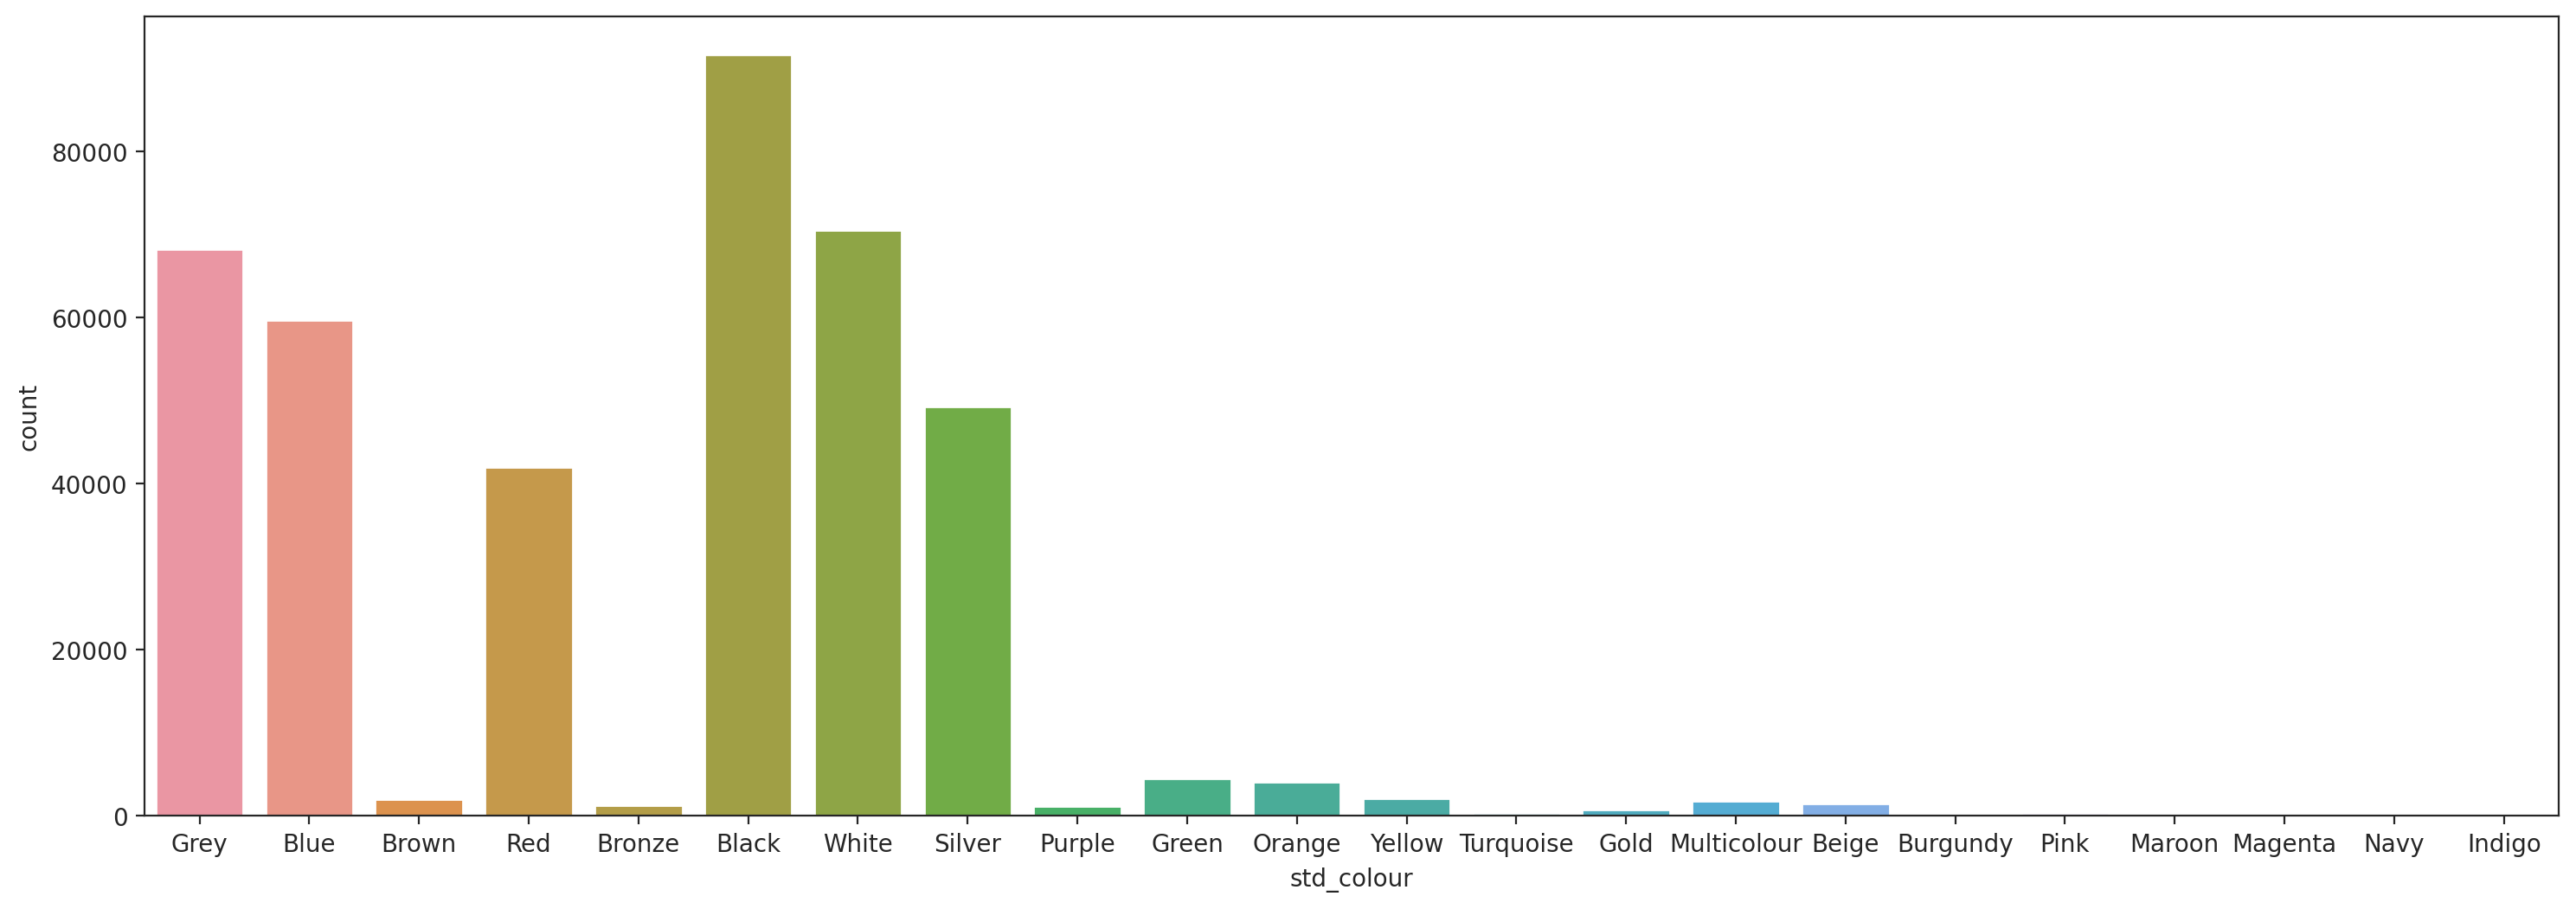

In [54]:
plt.figure(figsize=(18, 6))
sns.countplot(x='std_colour', data=adv)

In [55]:
adv['vehicle_condition'].value_counts()

USED    370739
NEW      31249
Name: vehicle_condition, dtype: int64

<Axes: xlabel='vehicle_condition', ylabel='count'>

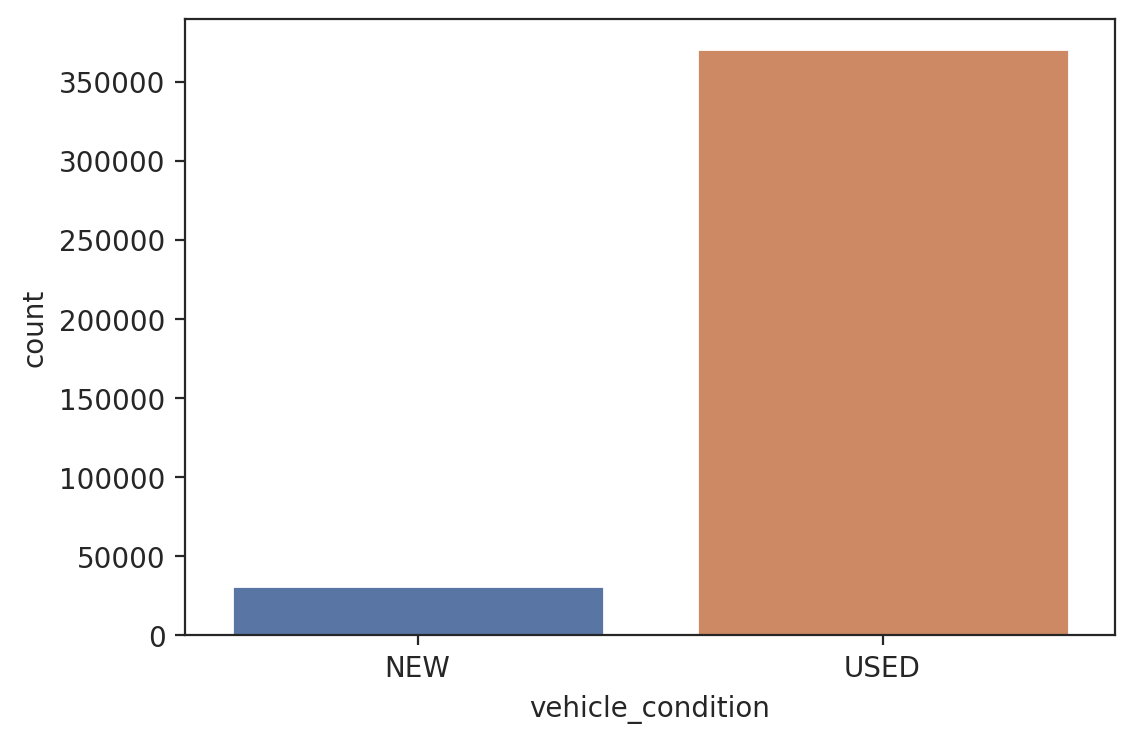

In [56]:
sns.countplot(x='vehicle_condition', data=adv)

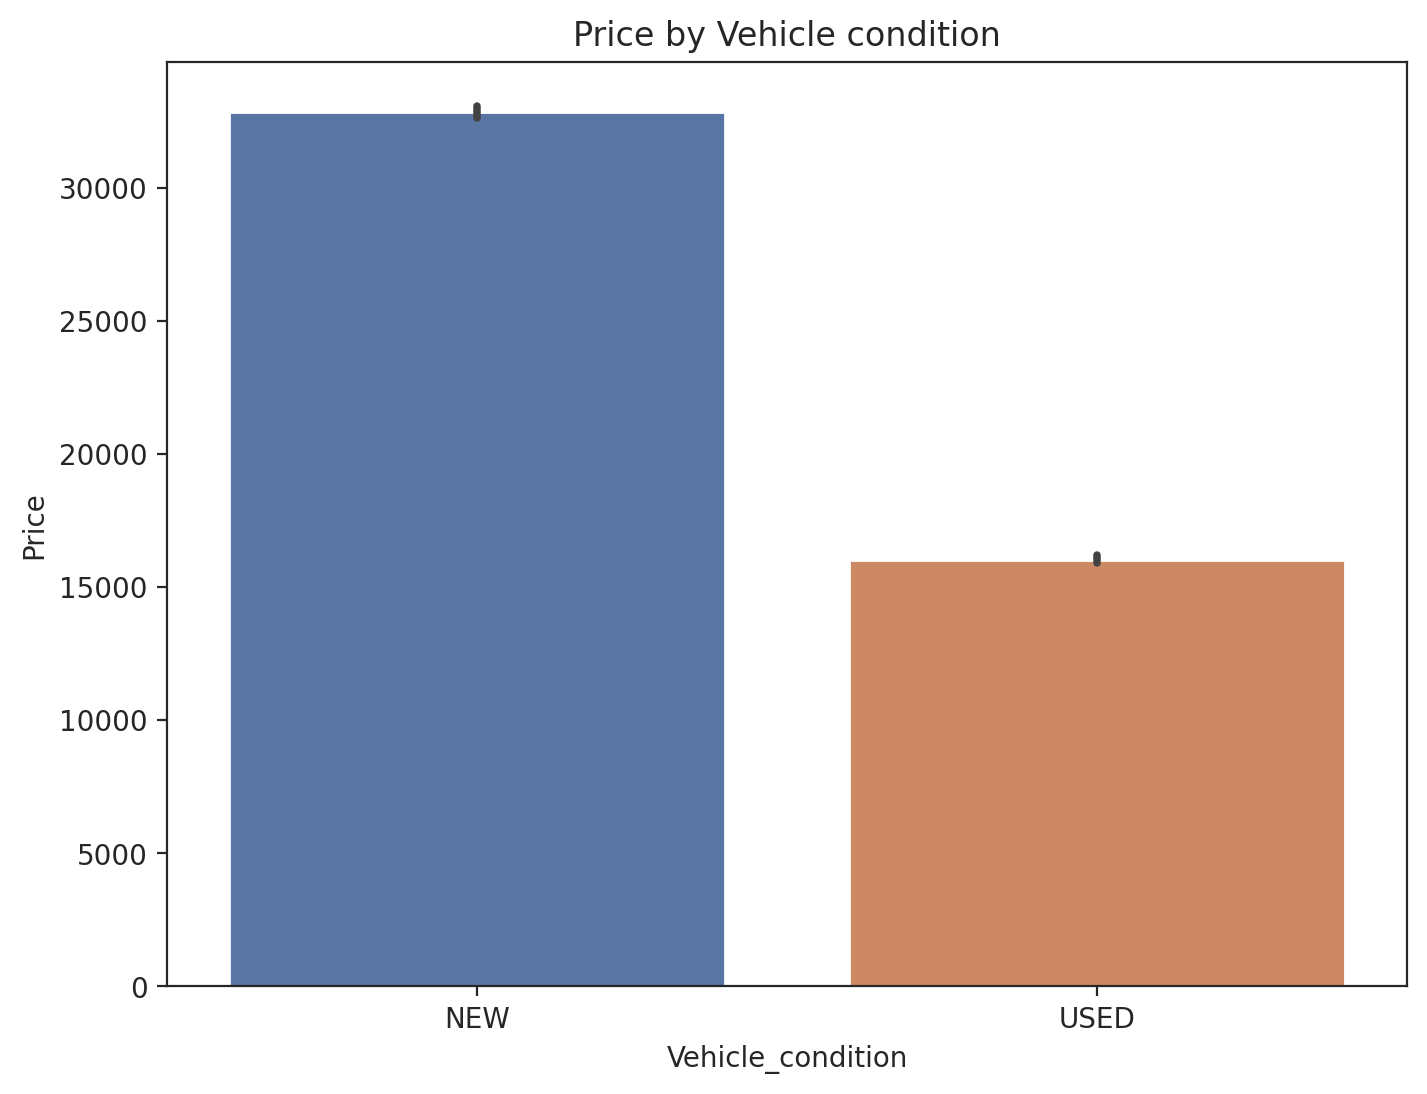

In [57]:
# A barplot to determine the effect vehicle condition has on the price
plt.figure(figsize=(8, 6))
sns.barplot(x='vehicle_condition', y='price', data=adv)
plt.xlabel('Vehicle_condition')
plt.ylabel('Price')
plt.title('Price by Vehicle condition')
plt.show()

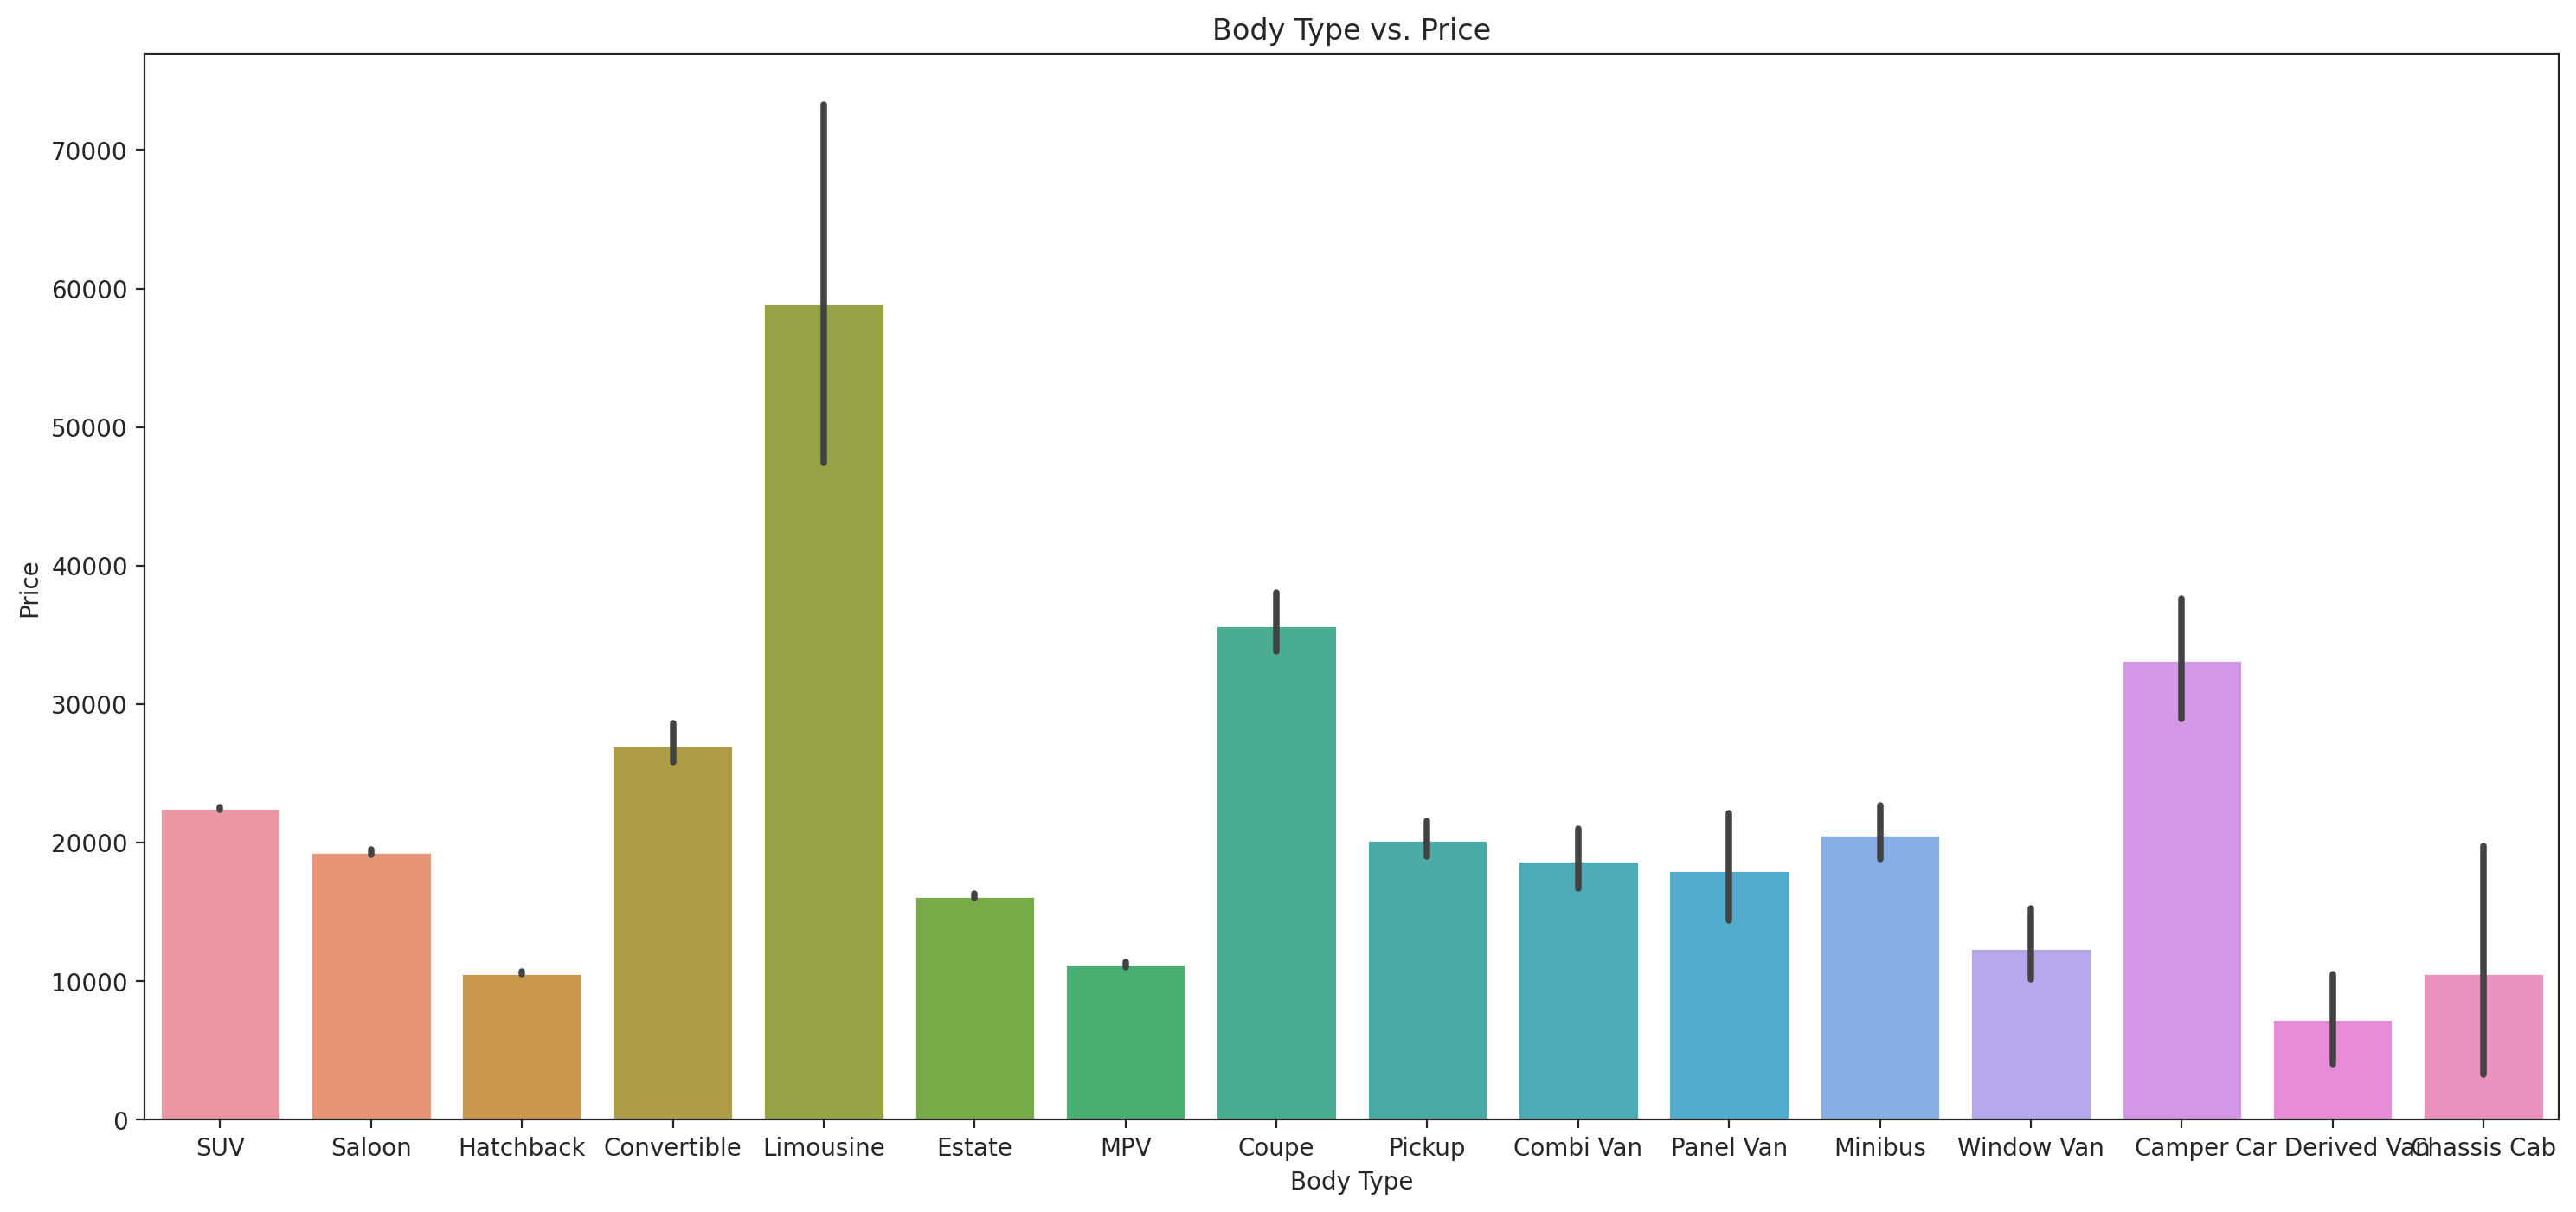

In [58]:
# A barplot to determine the effect vehicle body type has on the price
plt.figure(figsize=(18, 8))
sns.barplot(x='body_type', y='price', data=adv)
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Body Type vs. Price')
plt.show()

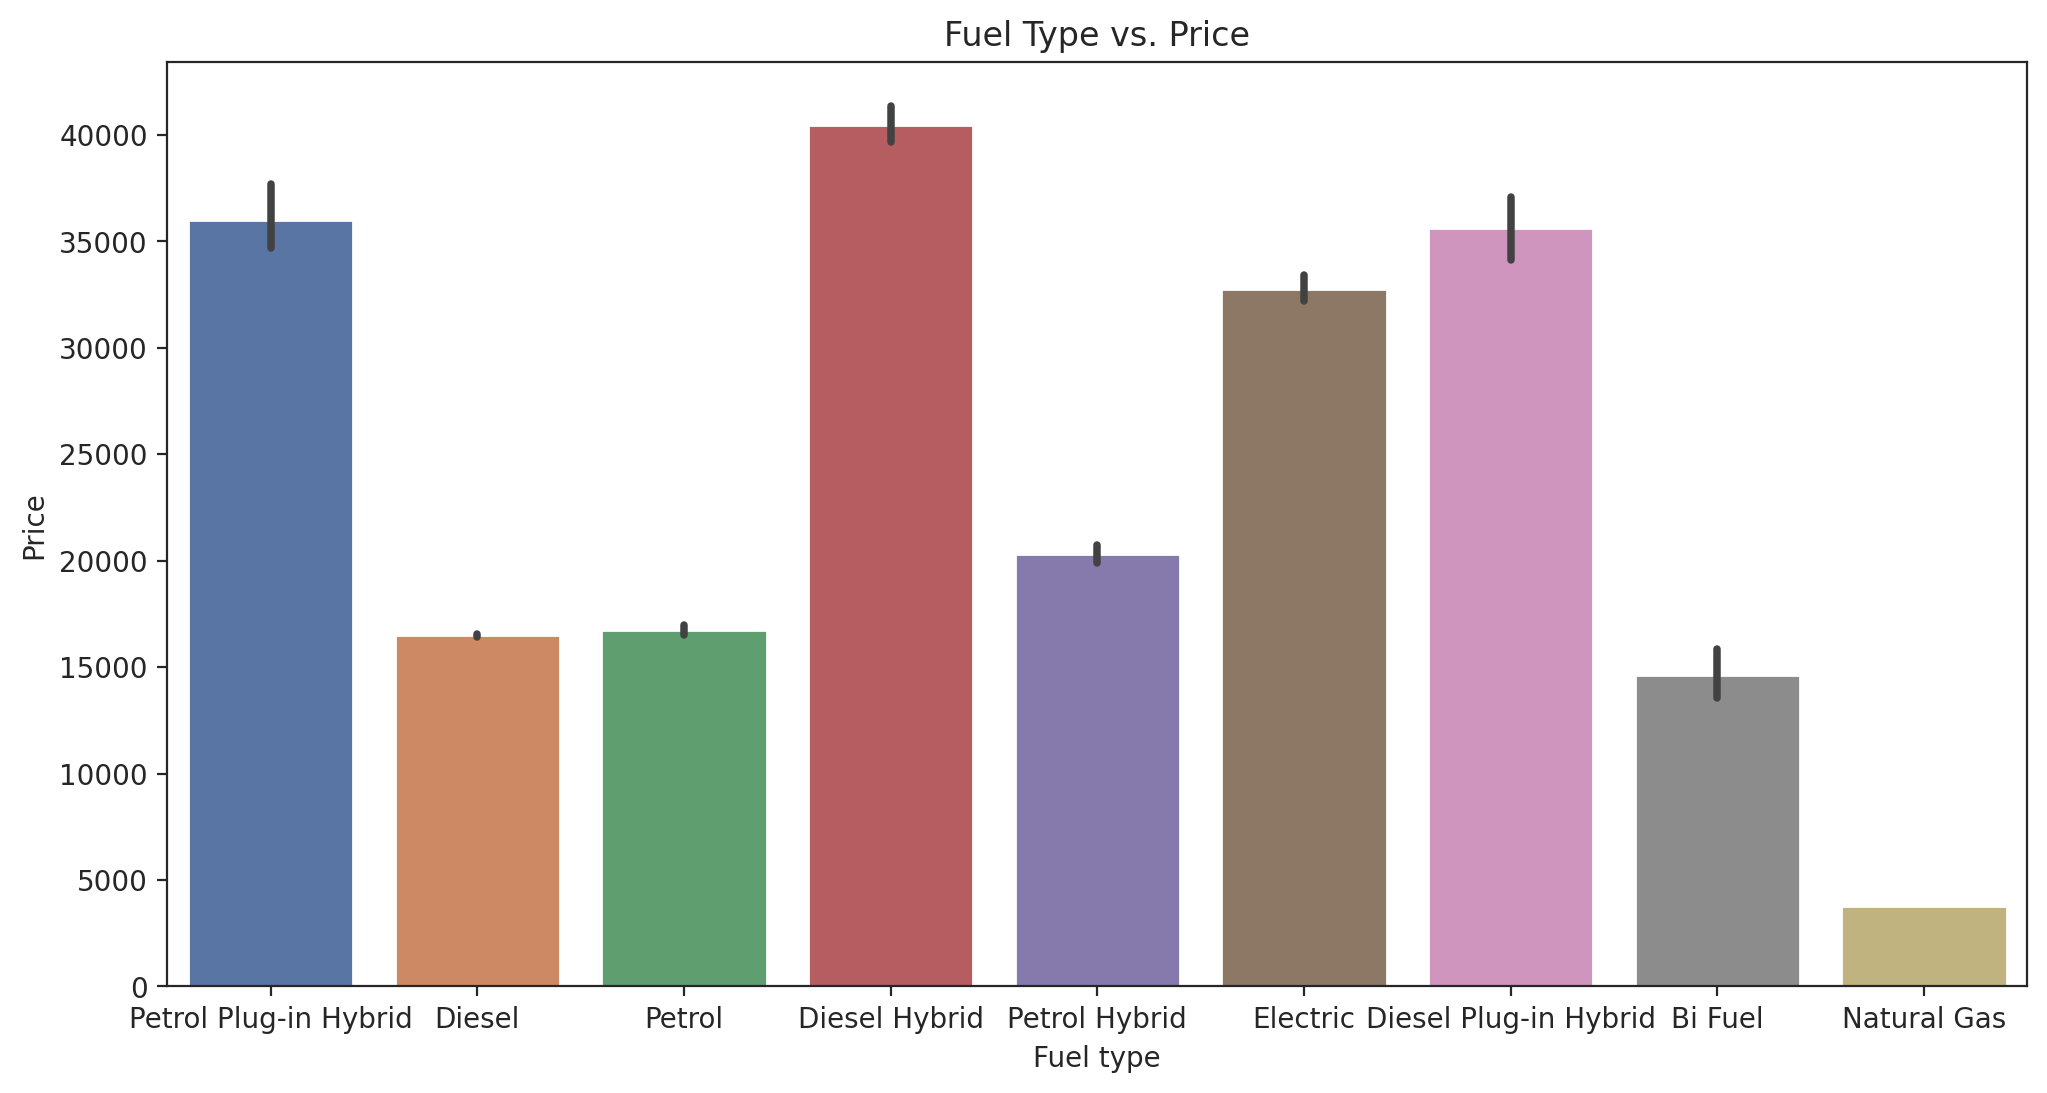

In [59]:
# A barplot to determine the effect fuel type has on the price
plt.figure(figsize=(12, 6))
sns.barplot(x='fuel_type', y='price', data=adv)
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.title('Fuel Type vs. Price')
plt.show()

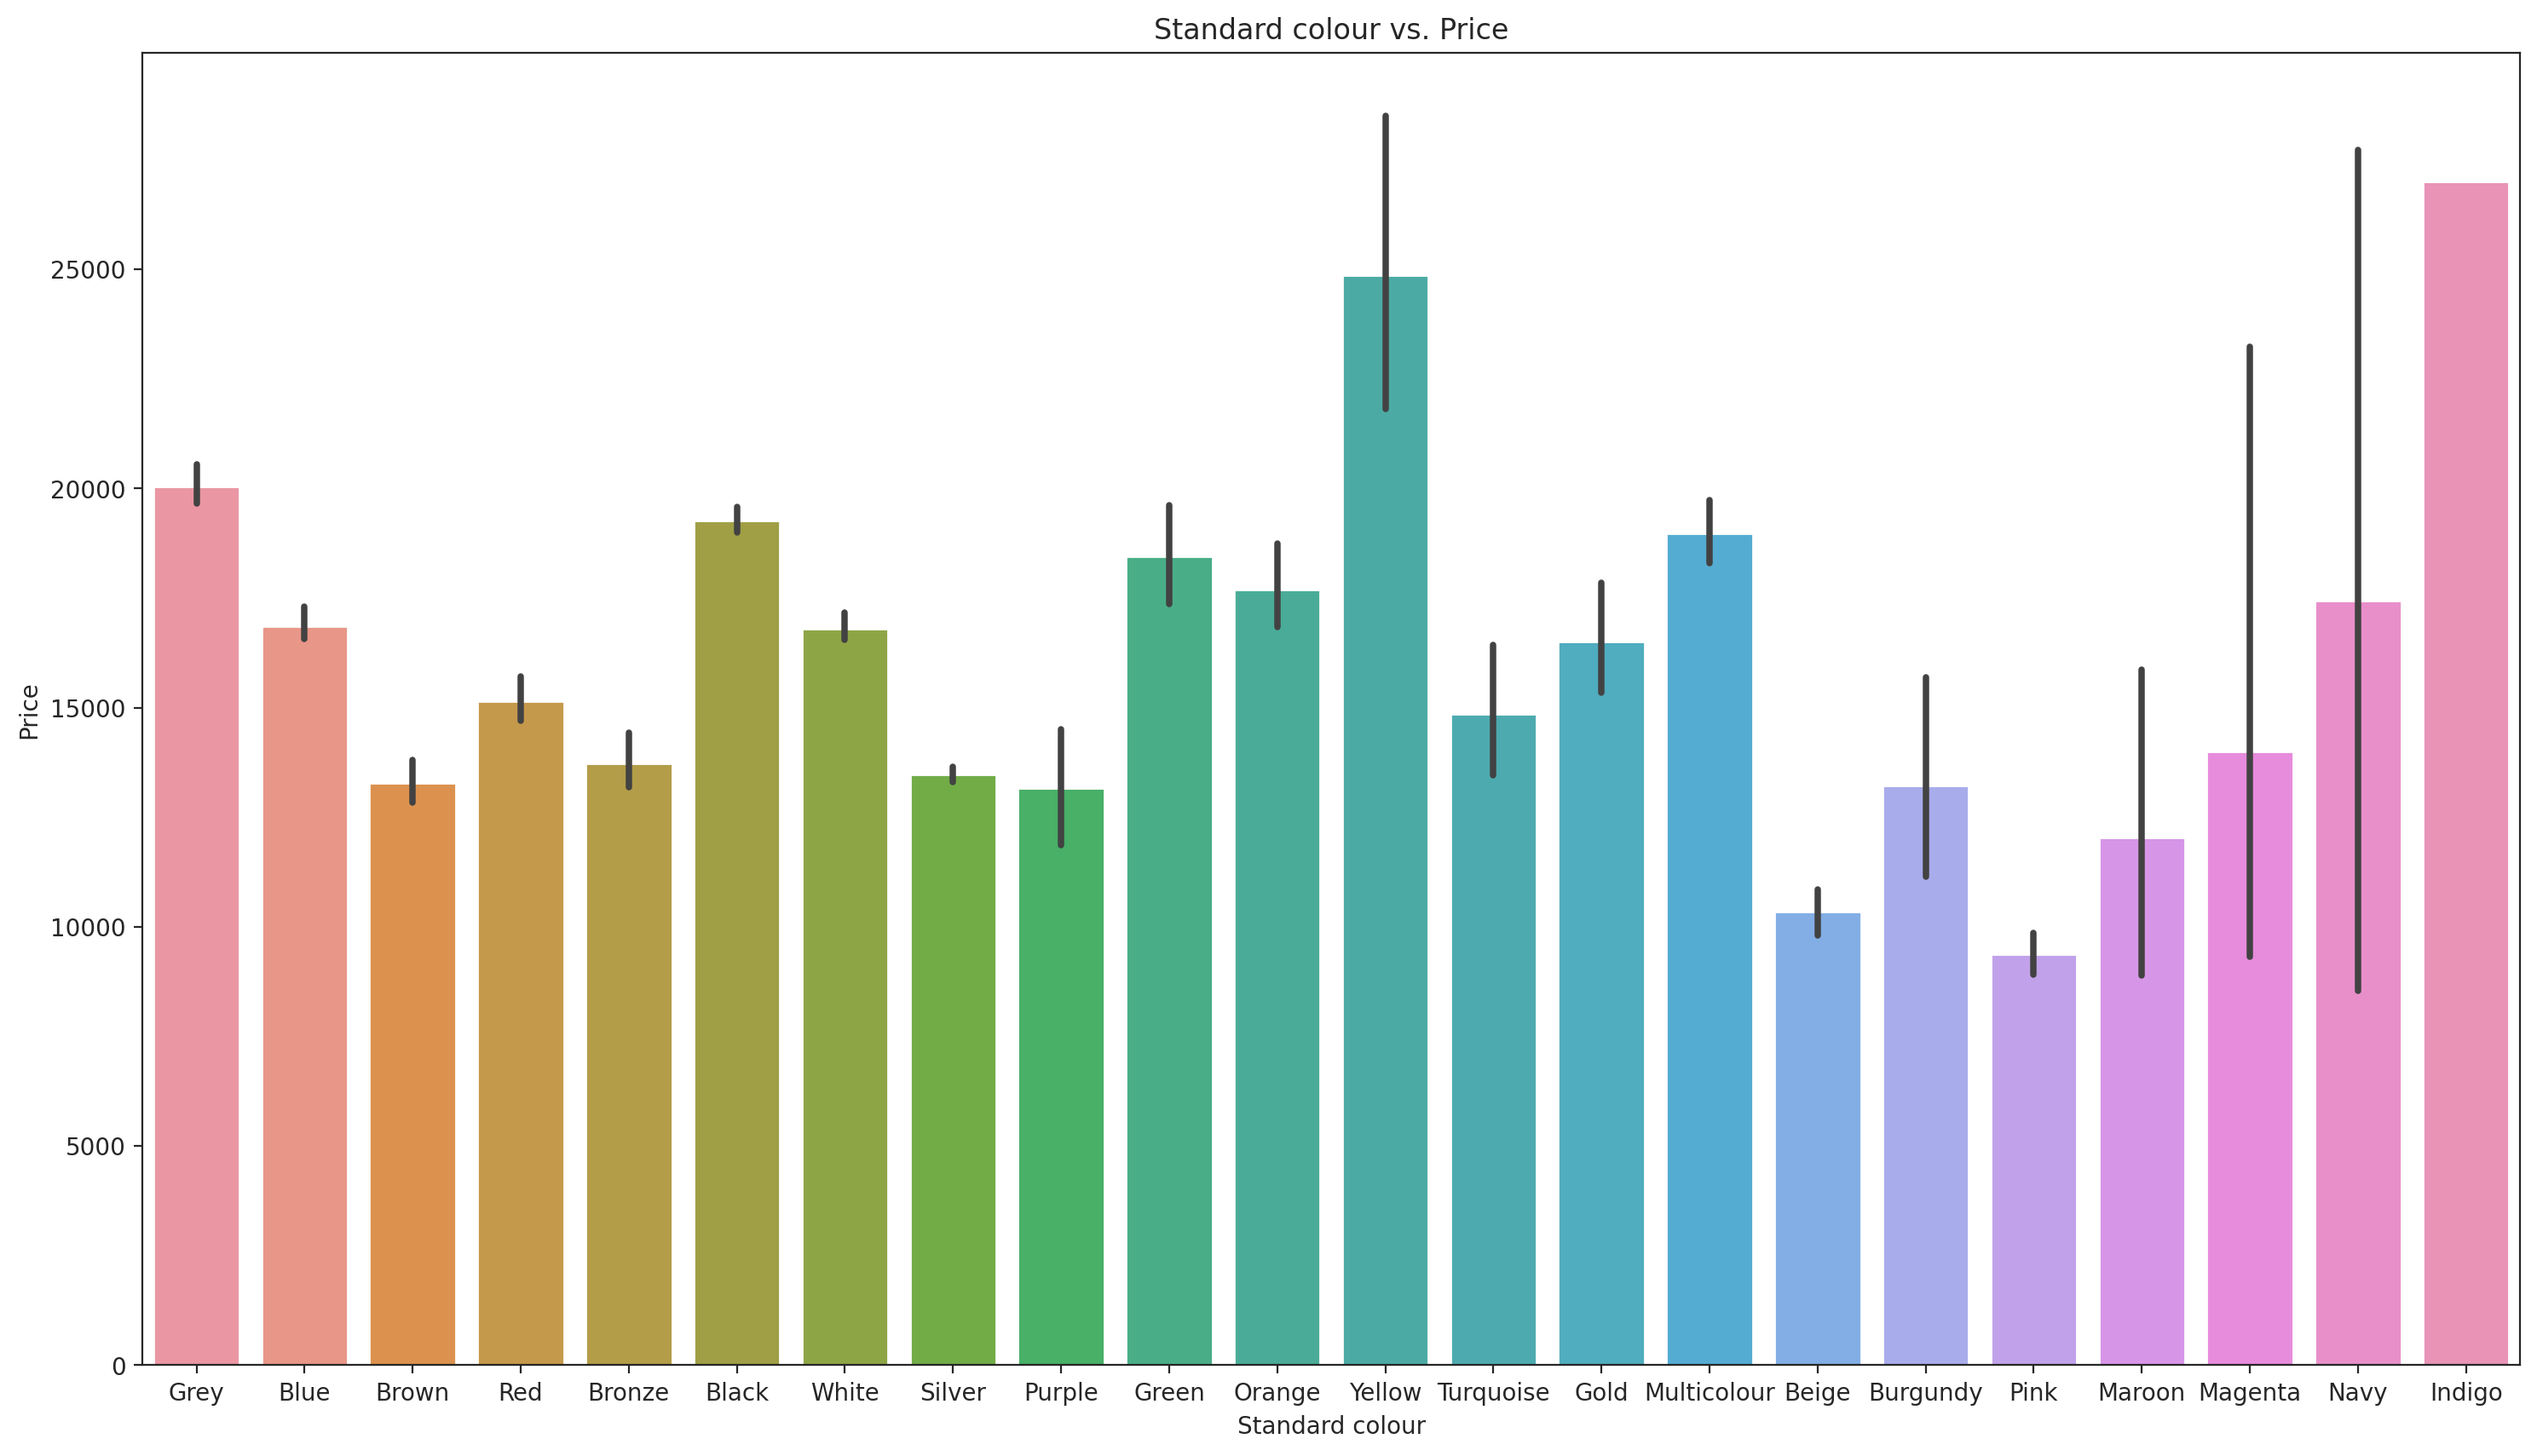

In [60]:
# A barplot to determine the effect vehicle colour has on the price
plt.figure(figsize=(18, 10))
sns.barplot(x='std_colour', y='price', data=adv)
plt.xlabel('Standard colour')
plt.ylabel('Price')
plt.title('Standard colour vs. Price')
plt.show()

In [61]:
adv['co_car_and_van'].value_counts()

False    400193
True       1795
Name: co_car_and_van, dtype: int64

<Axes: xlabel='co_car_and_van', ylabel='count'>

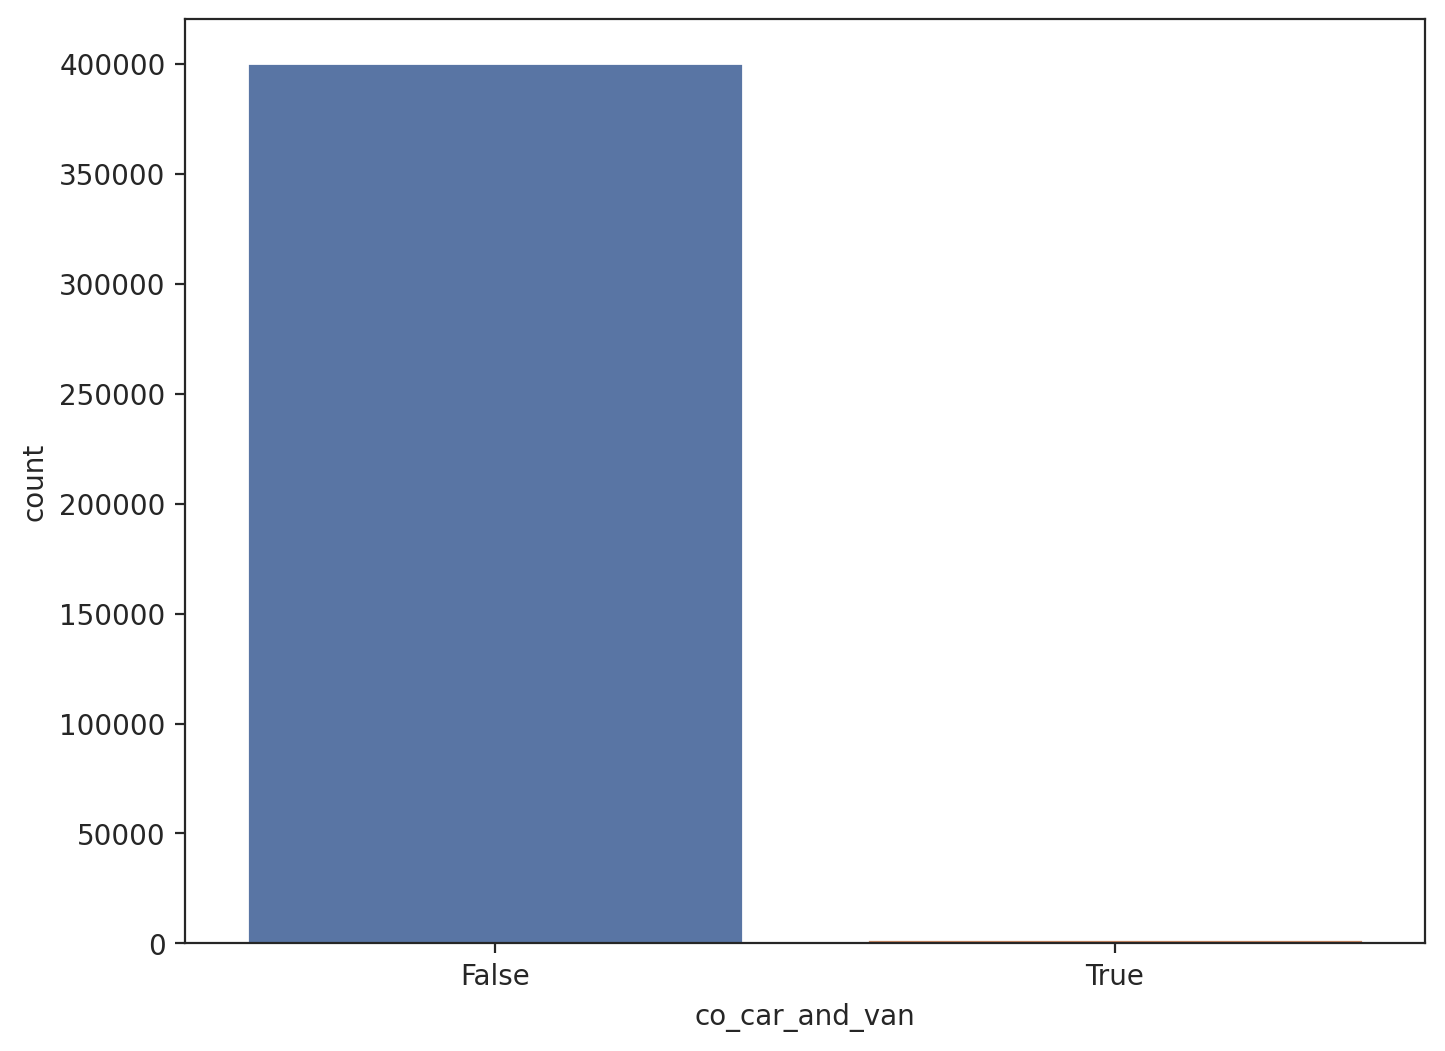

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='co_car_and_van', data=adv)

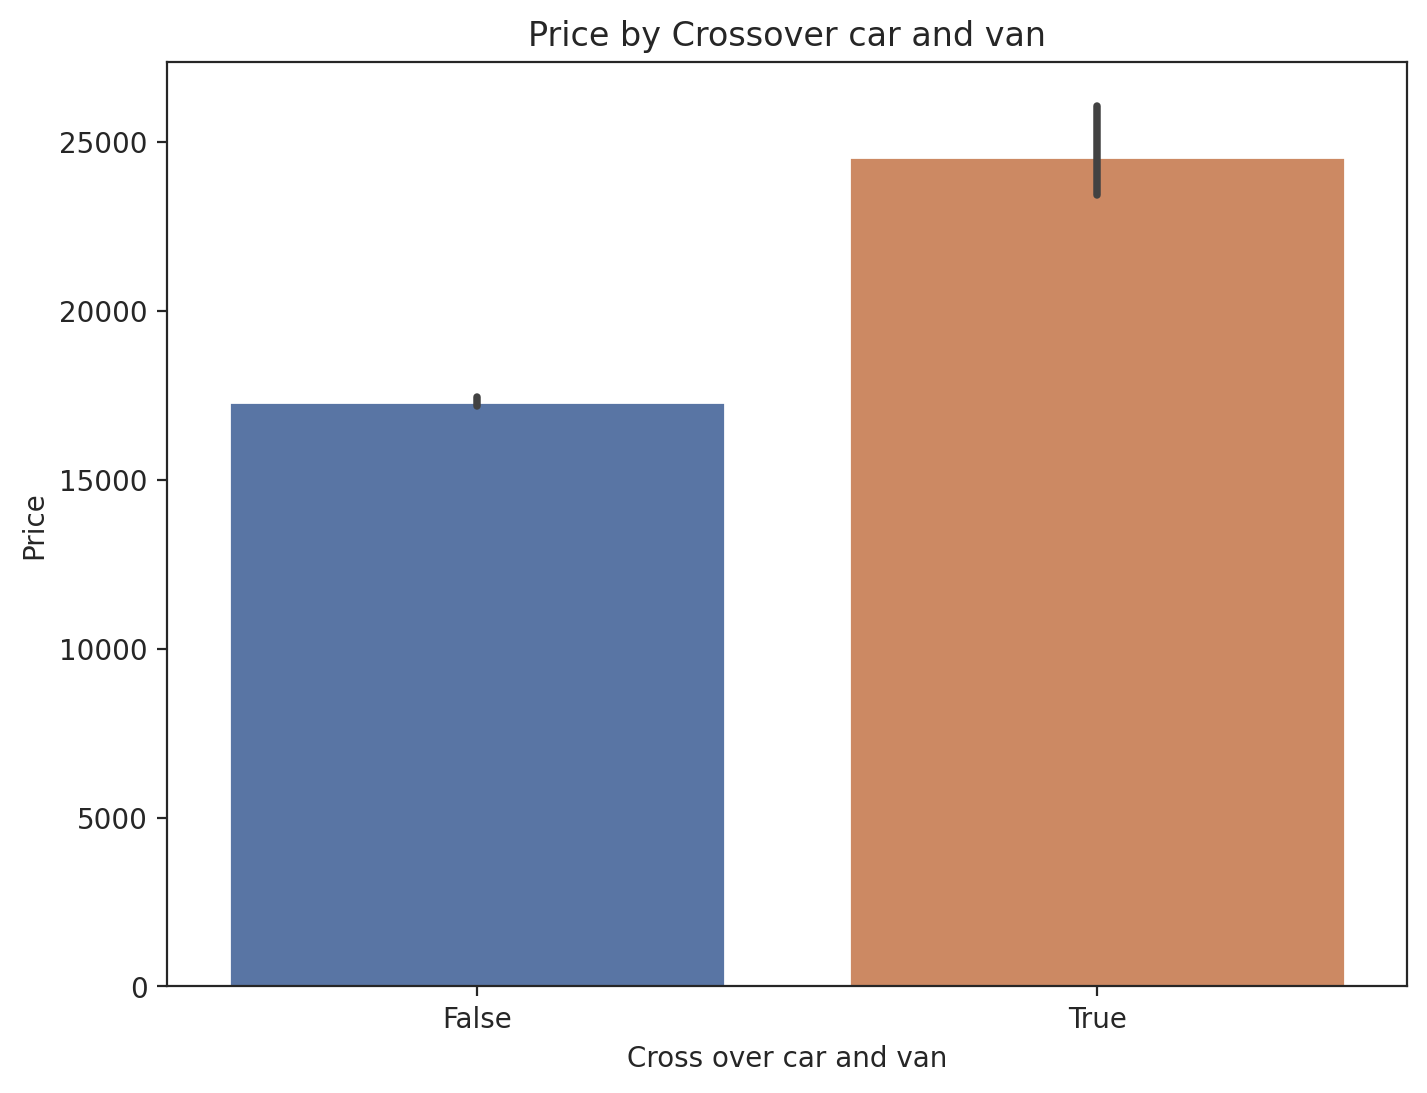

In [63]:
# A barplot to determine if the vehicle being a crossover car and van has an
# effect on the price
plt.figure(figsize=(8, 6))
sns.barplot(x='co_car_and_van', y='price', data=adv)
plt.xlabel('Cross over car and van')
plt.ylabel('Price')
plt.title('Price by Crossover car and van')
plt.show()

In [64]:
adv.groupby('fuel_type')[['price']].max().sort_values(by=['price'], ascending=False)

,price
fuel_type,
Petrol,9999999
Petrol Plug-in Hybrid,2695000
Petrol Hybrid,2049950
Diesel,1000000
Electric,174995
Diesel Hybrid,82175
Bi Fuel,69995
Diesel Plug-in Hybrid,67035
Natural Gas,3795


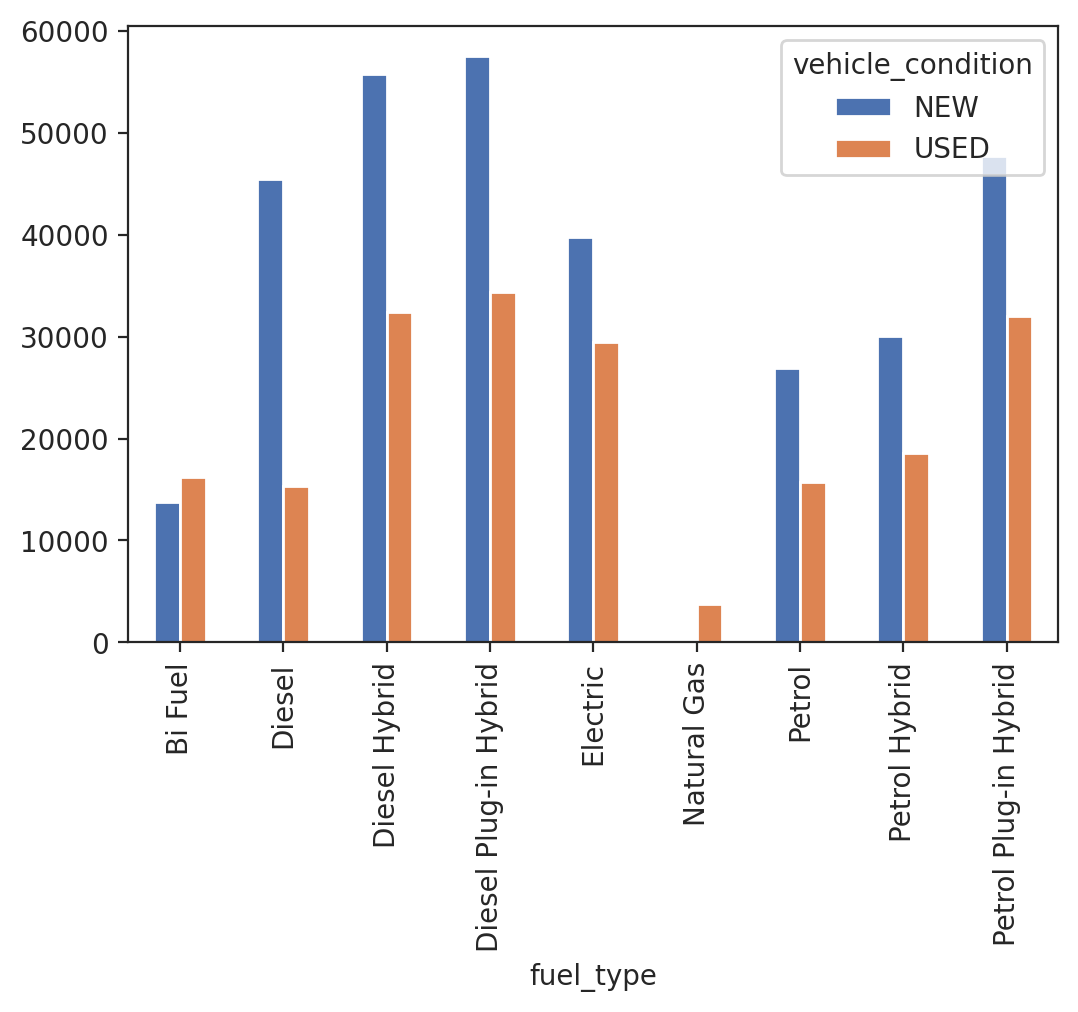

In [65]:
# A barplot to determine the effect of fuel type on price as it relates to
# vehicle condition
adv.groupby(['fuel_type', 'vehicle_condition'])['price'].mean().unstack().plot.bar();

In [66]:
adv.groupby('body_type')[['price']].max().sort_values(by=['price'], ascending=False)

,price
body_type,
Convertible,9999999
Coupe,9999999
Hatchback,3799995
Saloon,1200000
MPV,1000000
Limousine,374950
SUV,369000
Pickup,265000
Combi Van,180000


In [67]:
adv.groupby('fuel_type')[['price']].max().sort_values(by=['price'], ascending=False)

,price
fuel_type,
Petrol,9999999
Petrol Plug-in Hybrid,2695000
Petrol Hybrid,2049950
Diesel,1000000
Electric,174995
Diesel Hybrid,82175
Bi Fuel,69995
Diesel Plug-in Hybrid,67035
Natural Gas,3795


In [68]:
adv.groupby('fuel_type')[['price']].min().sort_values(by=['price'], ascending=False)

,price
fuel_type,
Diesel Plug-in Hybrid,9850
Petrol Plug-in Hybrid,5750
Diesel Hybrid,4980
Electric,4250
Natural Gas,3795
Petrol Hybrid,750
Bi Fuel,600
Diesel,200
Petrol,120


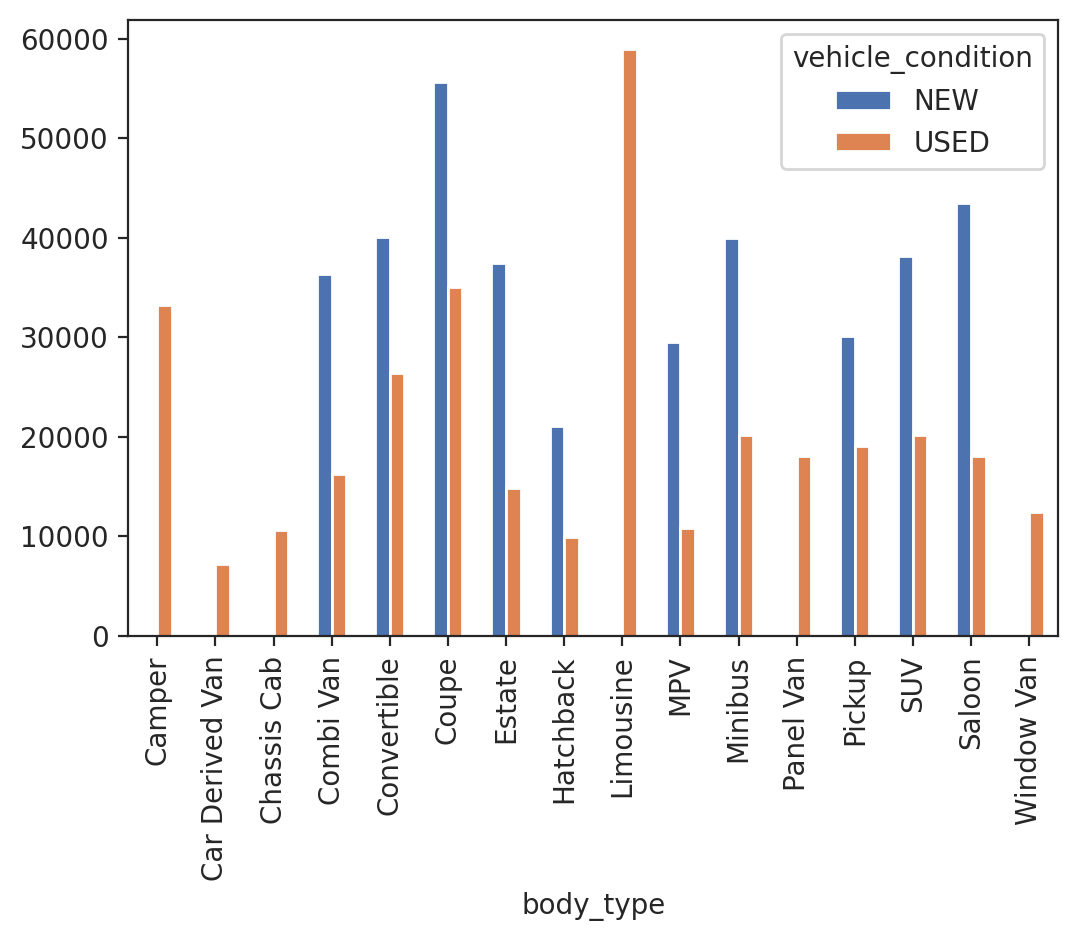

In [69]:
# A barplot to determine the effect of body type on price as it relates to
# vehicle condition
adv.groupby(['body_type', 'vehicle_condition'])['price'].mean().unstack().plot.bar();

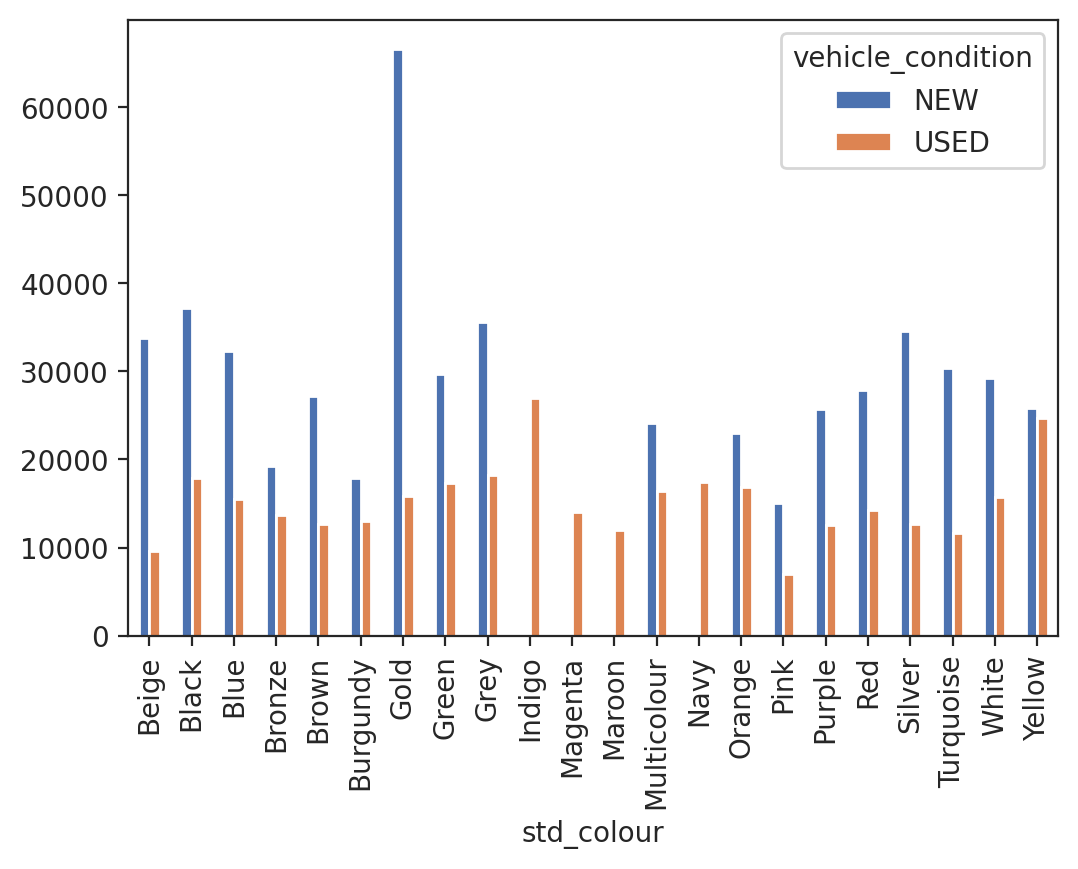

In [70]:
# A barplot to determine the effect of standard colour on price as it relates to
# vehicle condition
adv.groupby(['std_colour', 'vehicle_condition'])['price'].mean().unstack().plot.bar();

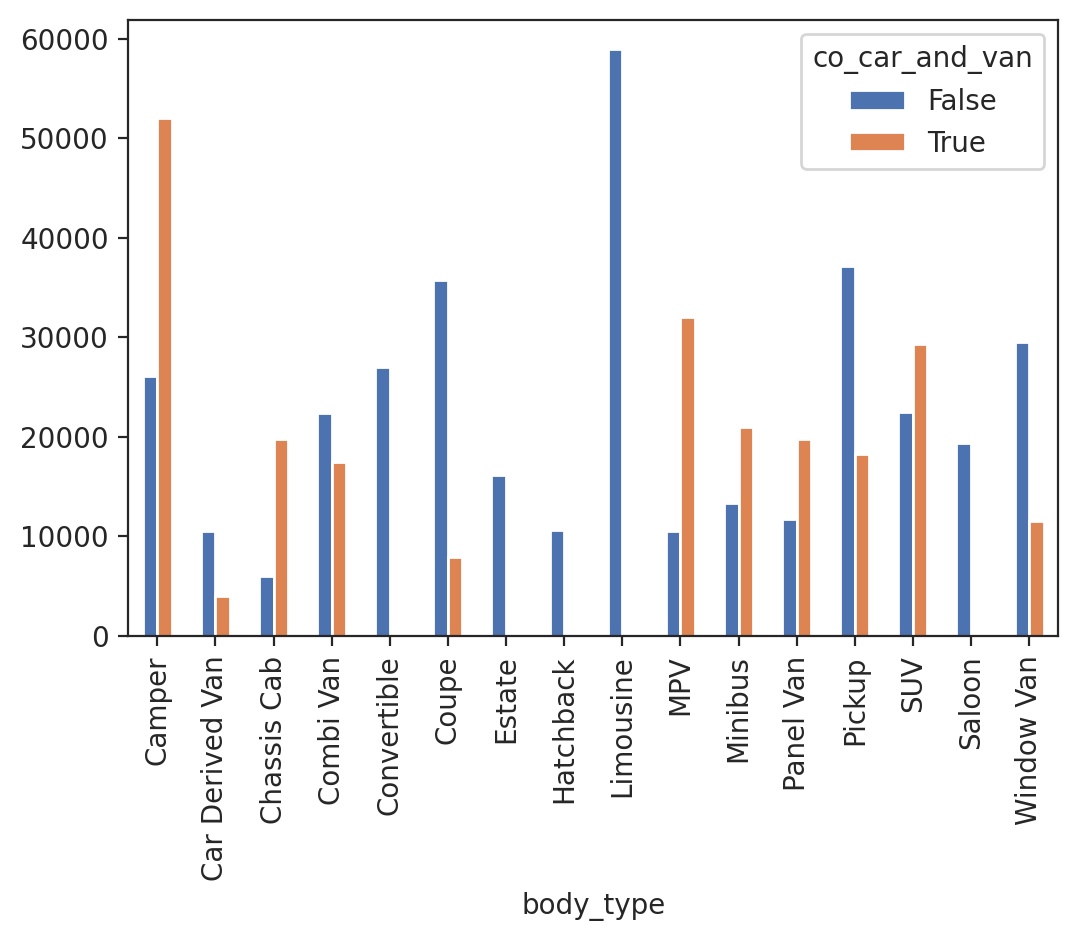

In [71]:
# A barplot to determine the effect of body type on price as it relates to
# if it is a crossover car and van
adv.groupby(['body_type', 'co_car_and_van'])['price'].mean().unstack().plot.bar();

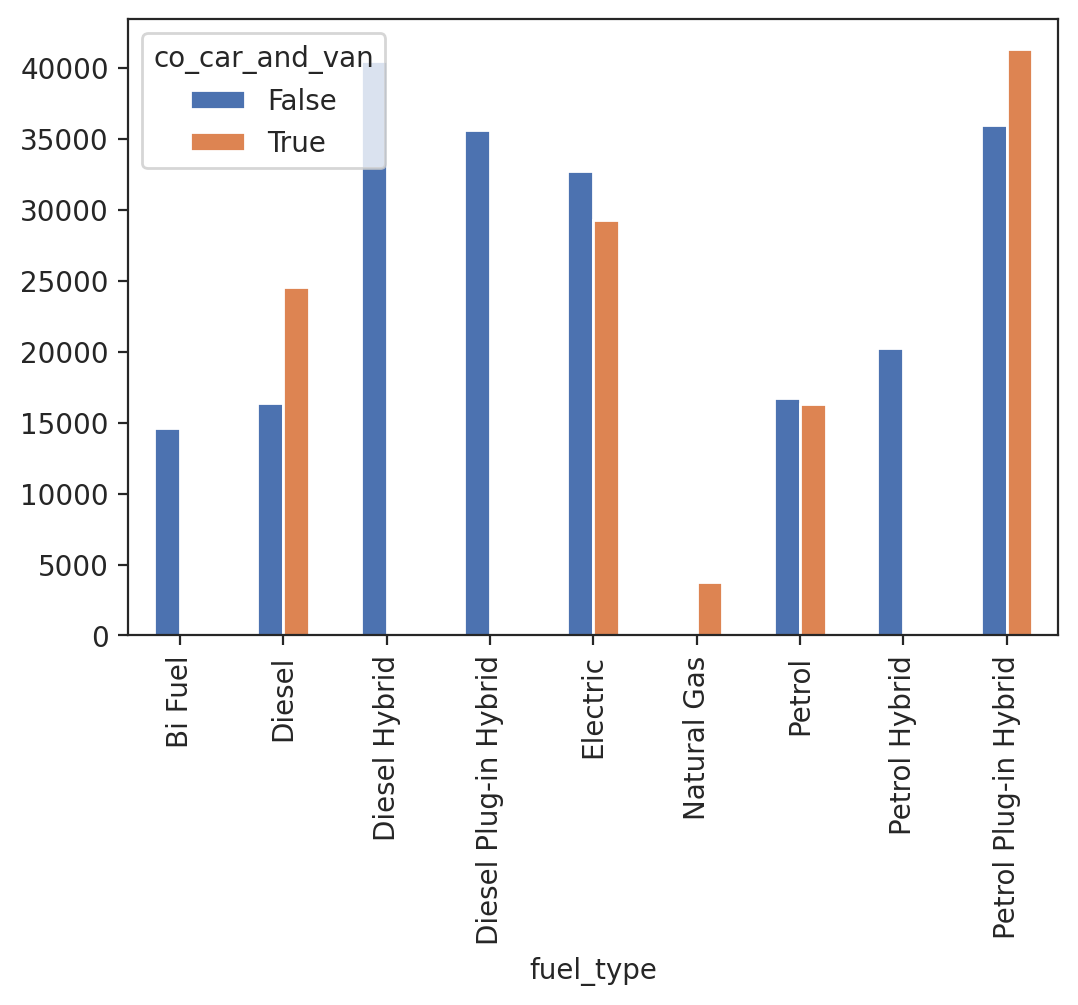

In [72]:
# A barplot to determine the effect of fuel type on price as it relates to
# if it is a crossover car and van
adv.groupby(['fuel_type', 'co_car_and_van'])['price'].mean().unstack().plot.bar();

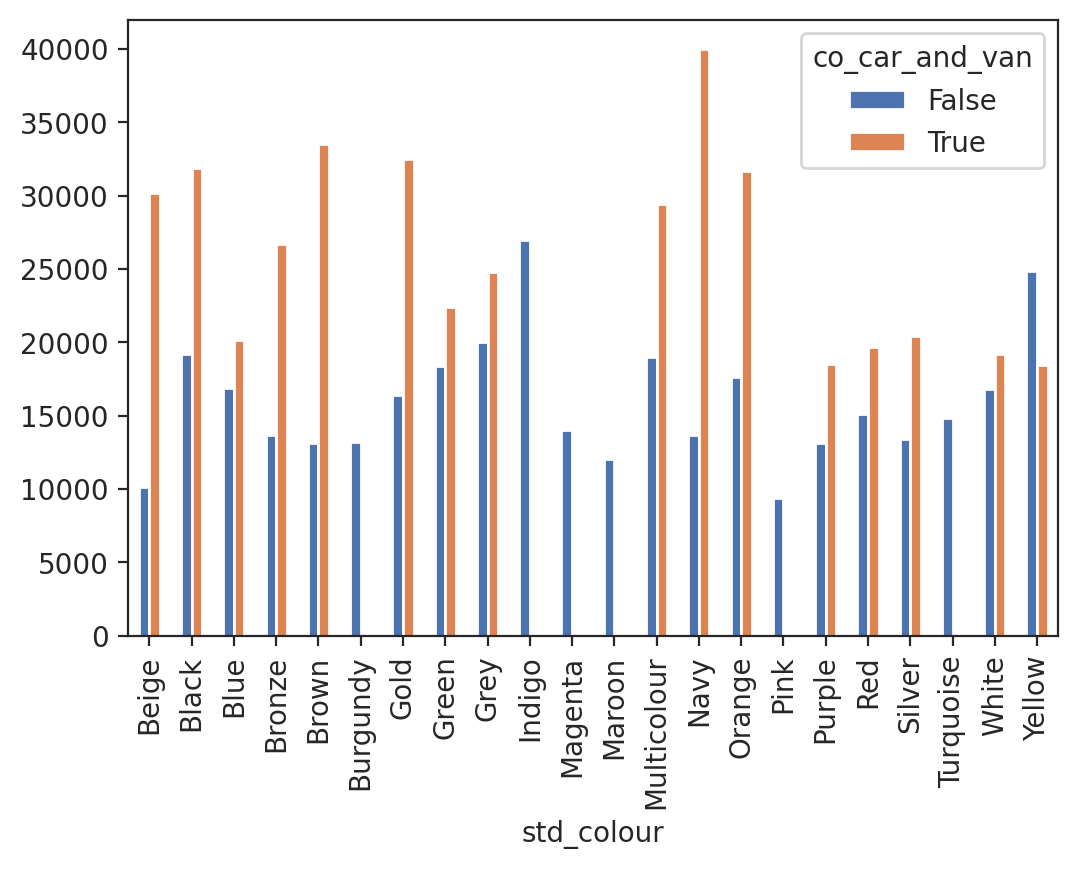

In [73]:
# A barplot to determine the effect of standard colour on price as it relates to
# if it is a crossover car and van
adv.groupby(['std_colour', 'co_car_and_van'])['price'].mean().unstack().plot.bar();

In [74]:
adv['std_make'].value_counts()

BMW               37372
Audi              35278
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31916
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: std_make, Length: 110, dtype: int64

In [75]:
adv['std_model'].value_counts()

Golf                11583
Corsa               10647
C Class              8549
3 Series             8347
Polo                 7681
                    ...  
Isetta                  1
Starlet Glanza V        1
RX 200t                 1
Scuderia Spider         1
480                     1
Name: std_model, Length: 1168, dtype: int64

In [76]:
standardmake_price = adv.groupby('std_make')[['price']].max().sort_values(by=['price'], ascending=False)

In [77]:
standardmake_price.head(20)

,price
std_make,
Ferrari,9999999
Porsche,9999999
Lamborghini,9999999
Maserati,9999999
Bugatti,2850000
McLaren,2695000
Pagani,2400000
Aston Martin,1200000
Mercedes-Benz,1000000


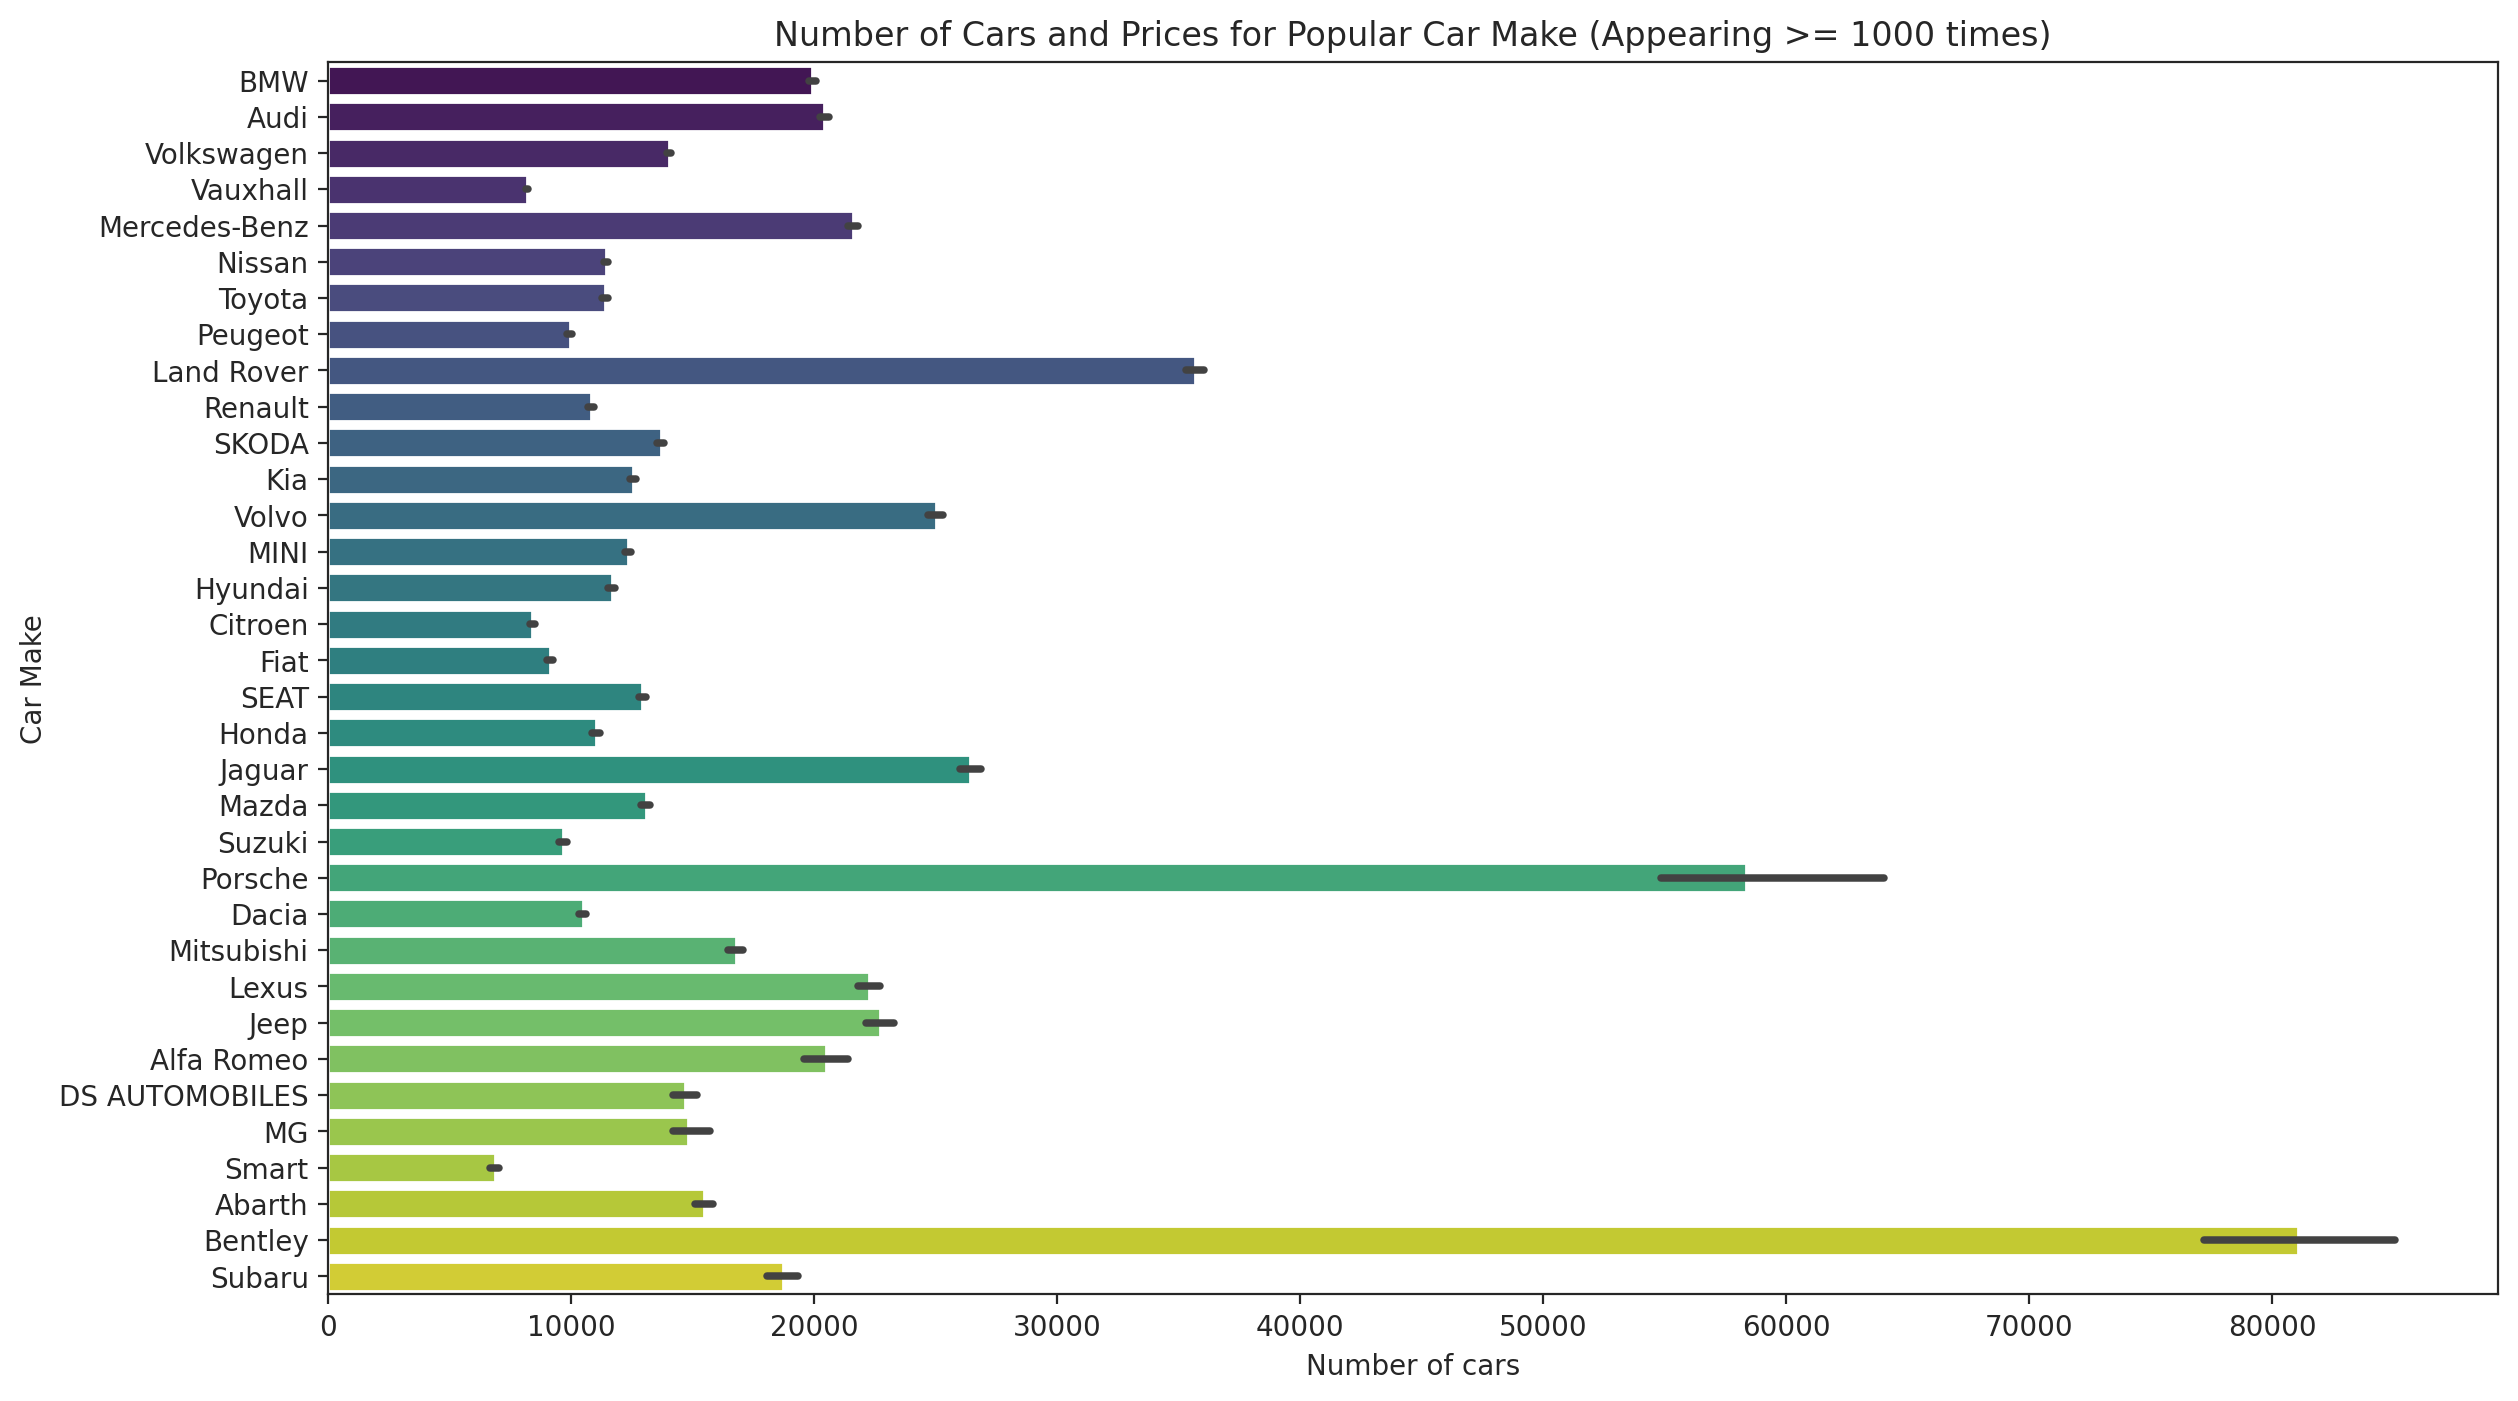

In [78]:
# Subsetting the standard make column to values >= 1000
popular_car_make = adv['std_make'].value_counts()[adv['std_make'].value_counts() >= 1000].index

filtered_car_make = adv[adv['std_make'].isin(popular_car_make)]

# A barplot to determine the effect of Standard make on price
plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='std_make', data=filtered_car_make, palette='viridis', order=filtered_car_make['std_make'].value_counts().index)
plt.title('Number of Cars and Prices for Popular Car Make (Appearing >= 1000 times)')
plt.xlabel('Number of cars')
plt.ylabel('Car Make')
plt.show()

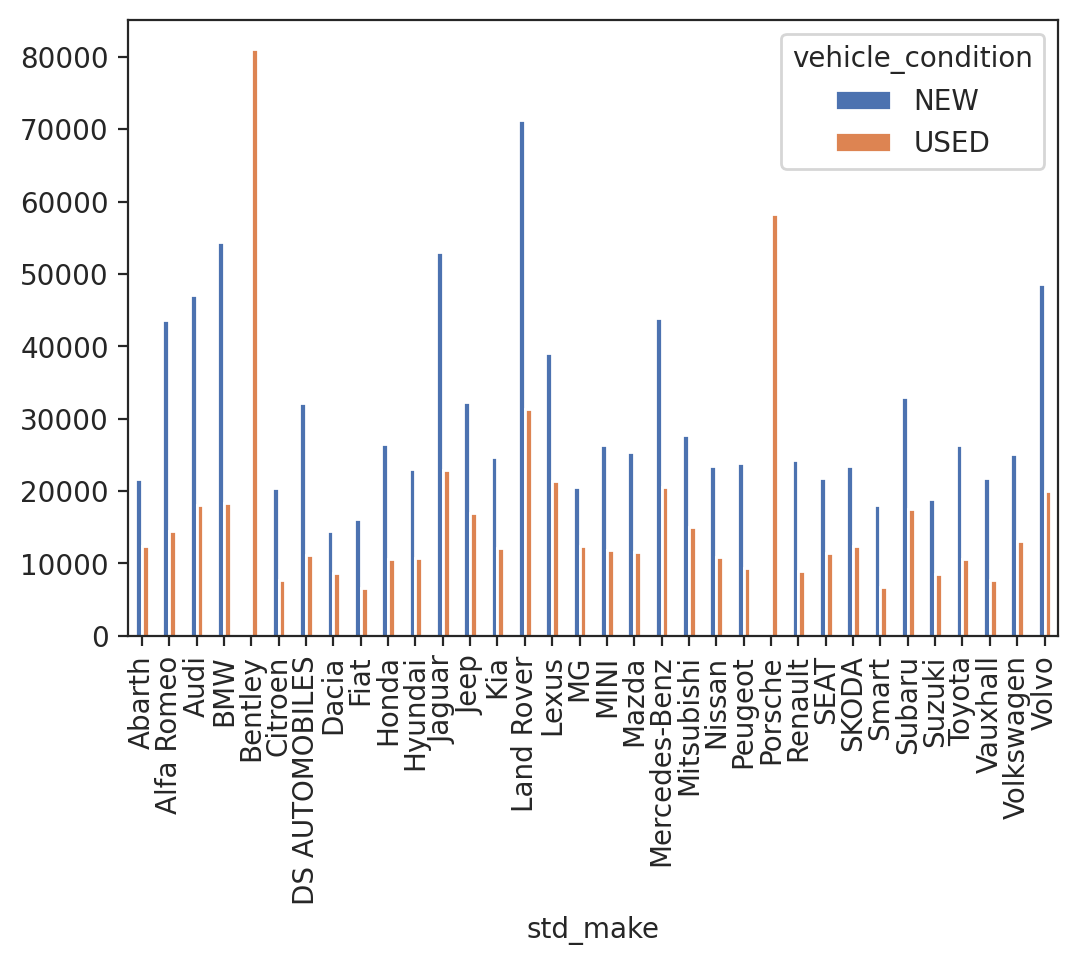

In [79]:
filtered_car_make.groupby(['std_make', 'vehicle_condition'])['price'].mean().unstack().plot.bar();

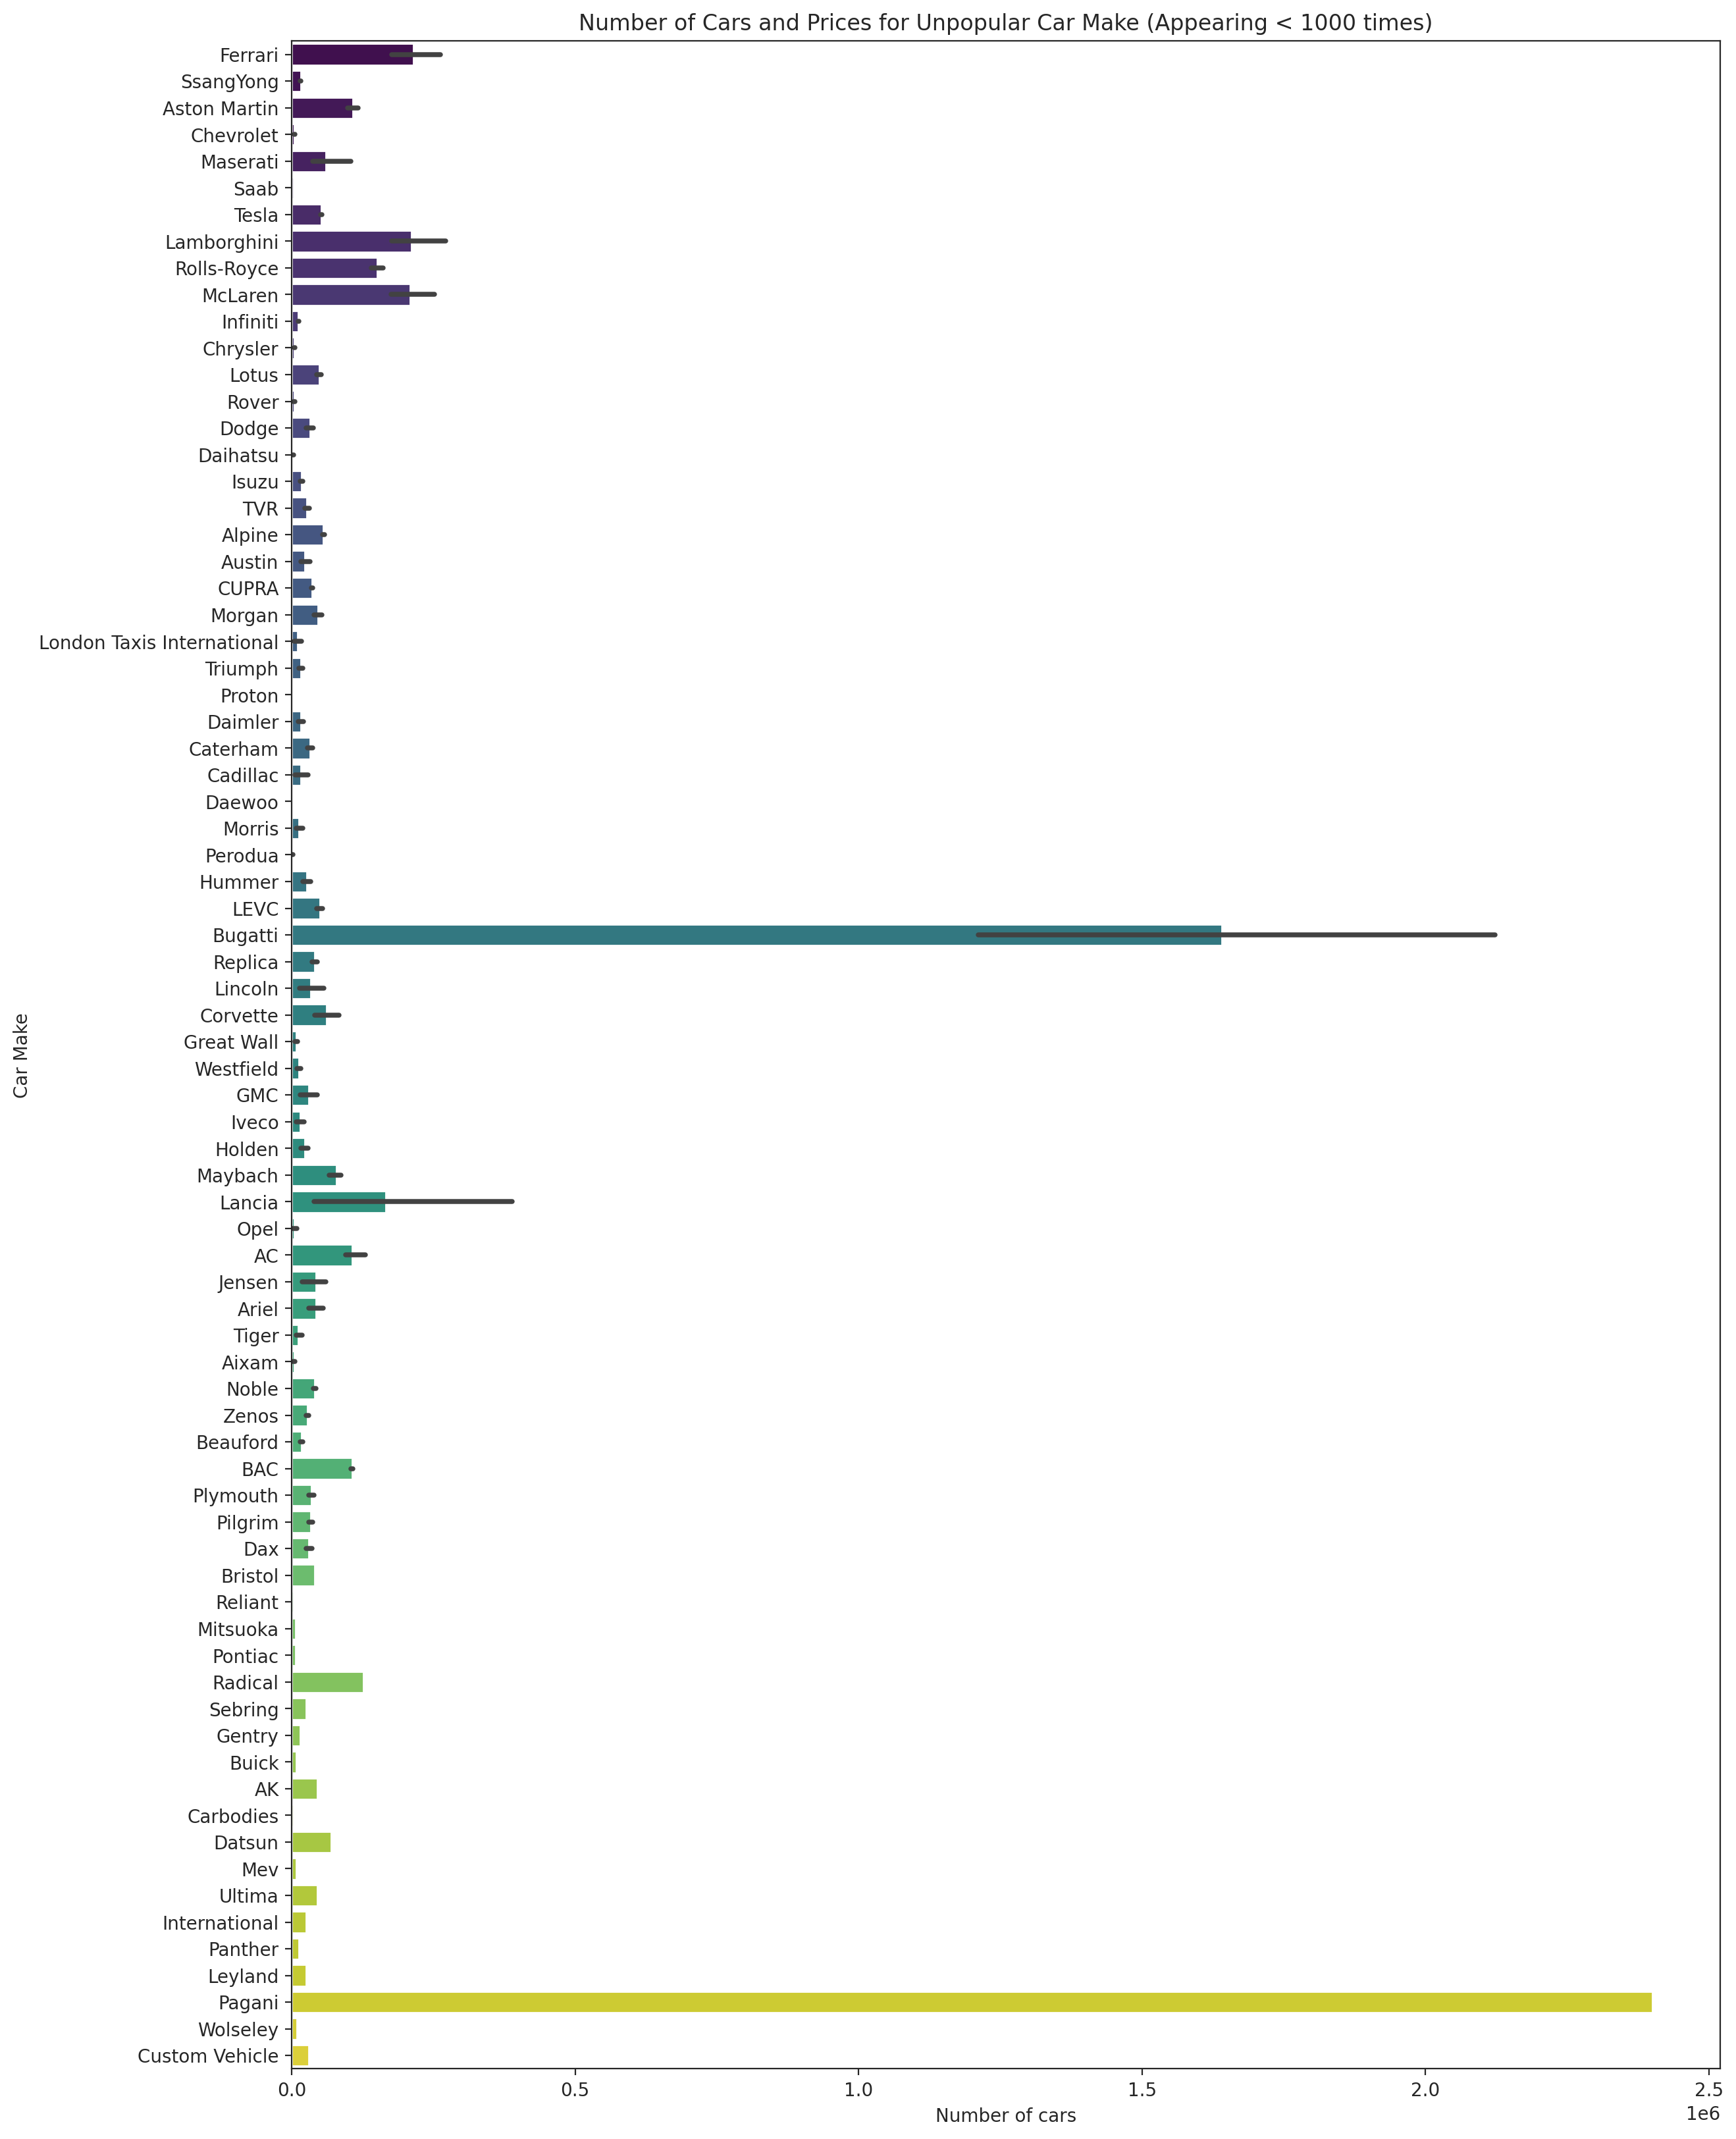

In [80]:
# Subsetting the standard make column to values < 1000
unpopular_car_make = adv['std_make'].value_counts()[adv['std_make'].value_counts() <1000].index
filtered_car_make_unpop = adv[adv['std_make'].isin(unpopular_car_make)]

# A barplot to determine the effect of Standard make on price
plt.figure(figsize=(14, 20))
sns.barplot(x='price', y='std_make', data=filtered_car_make_unpop, palette='viridis', order=filtered_car_make_unpop['std_make'].value_counts().index)
plt.title('Number of Cars and Prices for Unpopular Car Make (Appearing < 1000 times)')
plt.xlabel('Number of cars')
plt.ylabel('Car Make')
plt.show()

In [81]:
standardmodel_price = adv.groupby('std_model')[['price']].max().sort_values(by=['price'], ascending=False)
standardmodel_price.head()

,price
std_model,
LaFerrari,9999999
250,9999999
959,9999999
Miura,9999999
275,9999999


In [82]:
chiron_adv = adv[adv['std_model'].str.contains('Chiron', case=False)]

In [83]:
chiron_adv.sample()

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
223835,202007081011555,1000.0,67,Blue,Bugatti,Chiron,USED,2018.0,2500000,Coupe,False,Petrol


In [84]:
miura_adv = adv[adv['std_model'].str.contains('Miura', case=False)]

In [85]:
miura_adv.sample()

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,2015.0,9999999,Coupe,False,Petrol


In [86]:
veyron_adv = adv[adv['std_model'].str.contains('Veyron', case=False)]

In [87]:
veyron_adv.sample()

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
103974,202010074708314,10895.0,16,Blue,Bugatti,Veyron,USED,2016.0,1699995,Coupe,False,Petrol


In [88]:
p1_adv = adv[adv['std_model'].str.contains('P1', case=False)]

In [89]:
p1_adv.sample()

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
64910,202006039766650,189.0,NaN,Black,McLaren,P1,USED,2015.0,2695000,Coupe,False,Petrol Plug-in Hybrid


In [90]:
huayra_adv = adv[adv['std_model'].str.contains('Huayra', case=False)]

In [91]:
huayra_adv.sample()

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
94033,202007020778467,1900.0,18,White,Pagani,Huayra,USED,2015.0,2400000,Convertible,False,Petrol


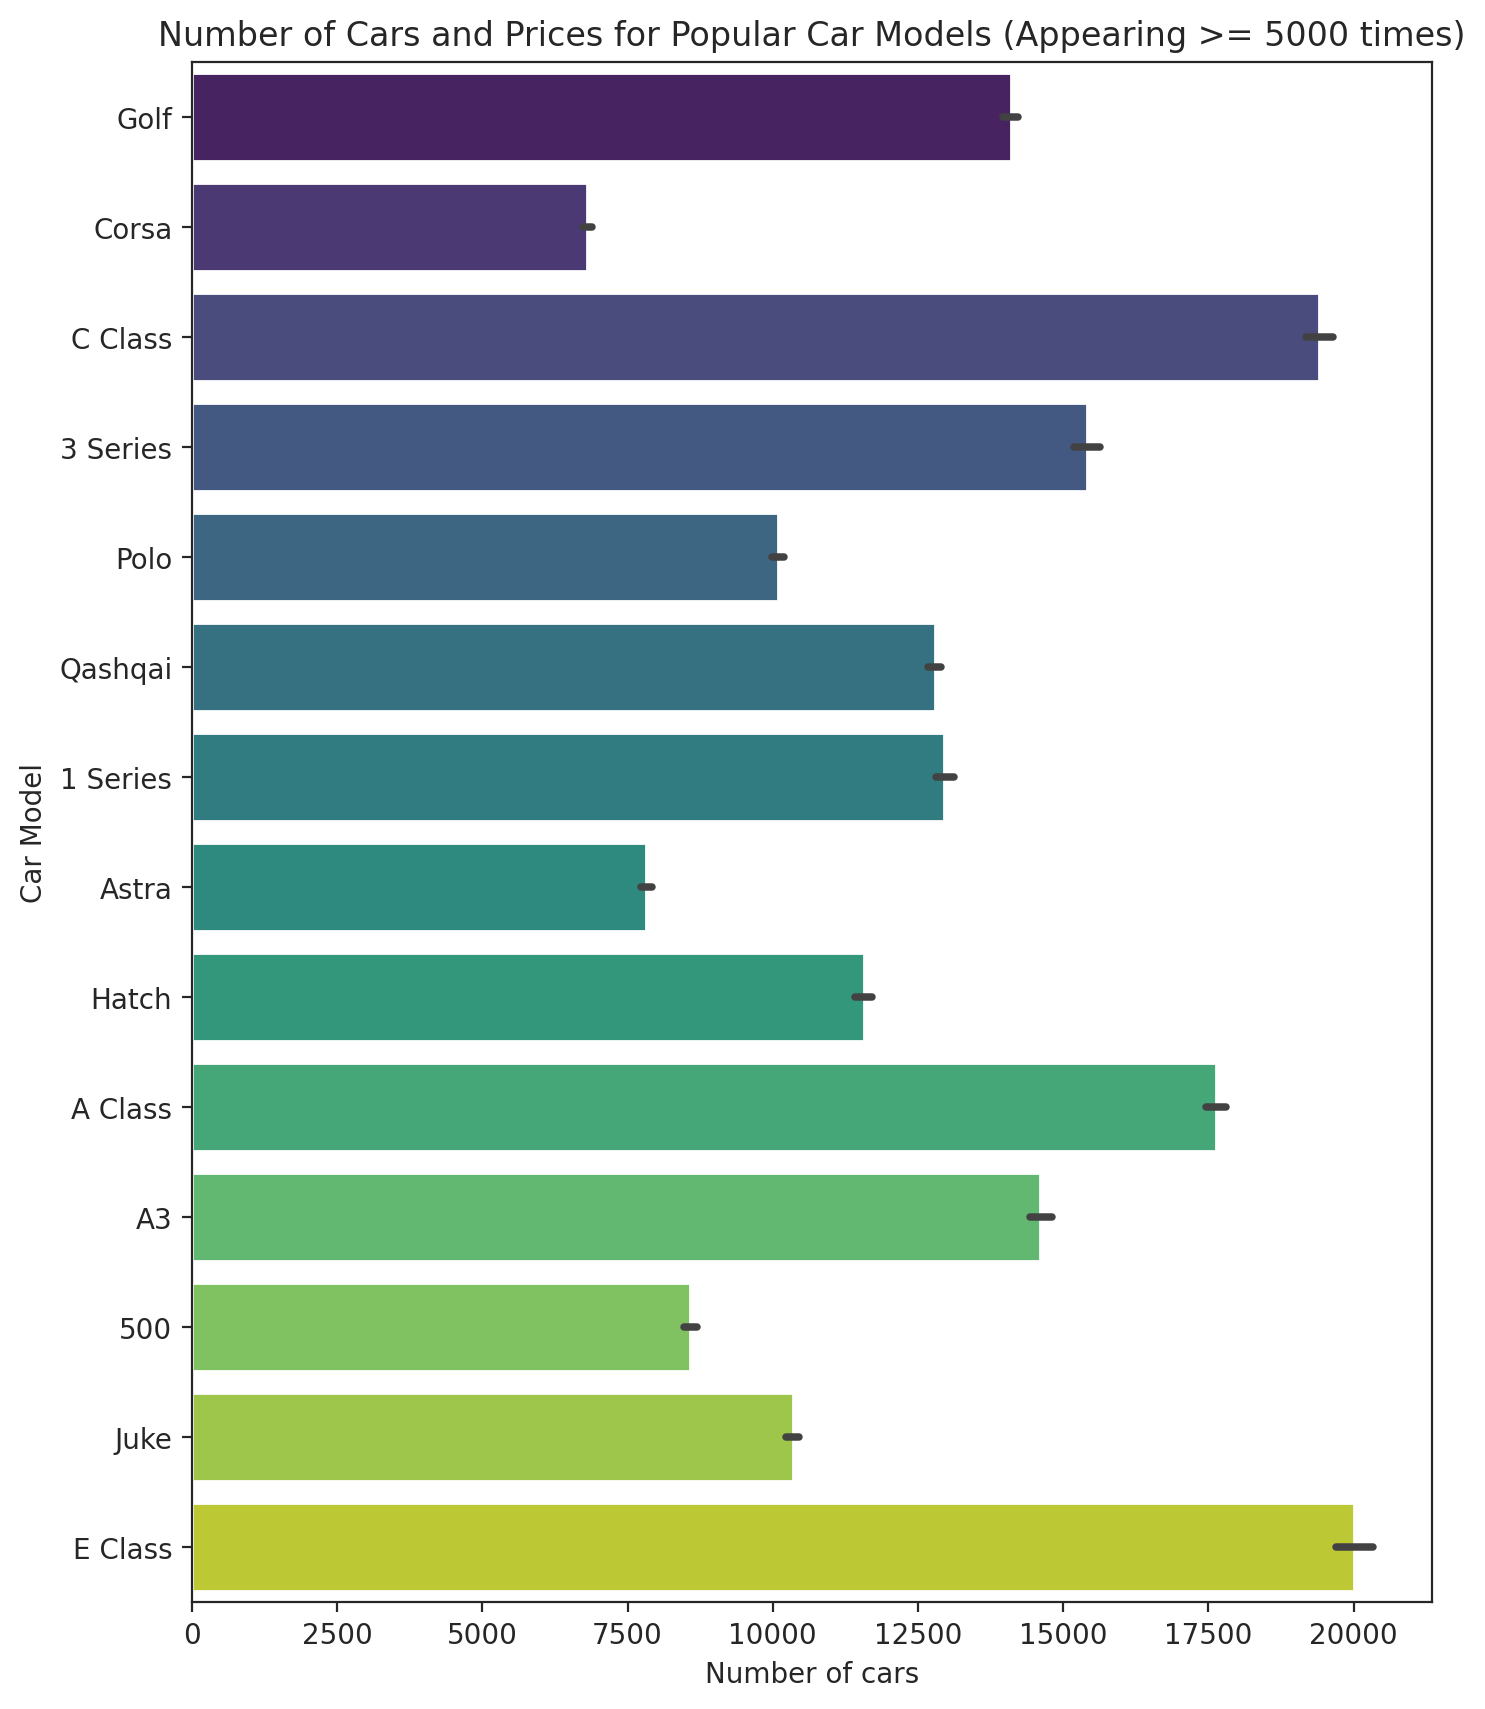

In [92]:
# Subsetting the standard model column to values >= 5000
popular_car_models = adv['std_model'].value_counts()[adv['std_model'].value_counts() >= 5000].index

filtered_cars = adv[adv['std_model'].isin(popular_car_models)]

# A barplot to determine the effect of Standard model on price
plt.figure(figsize=(8, 10))
sns.barplot(x='price', y='std_model', data=filtered_cars, palette='viridis', order=filtered_cars['std_model'].value_counts().index)
plt.title('Number of Cars and Prices for Popular Car Models (Appearing >= 5000 times)')
plt.xlabel('Number of cars')
plt.ylabel('Car Model')
plt.show()

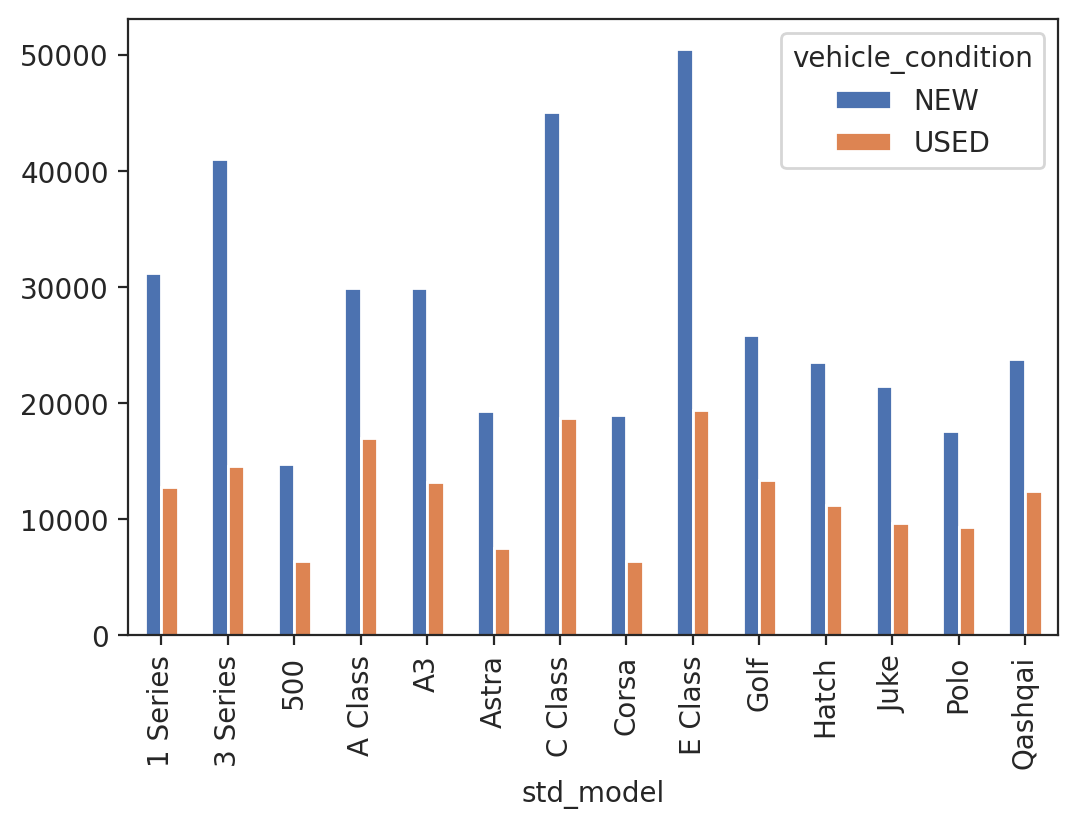

In [93]:
filtered_cars.groupby(['std_model', 'vehicle_condition'])['price'].mean().unstack().plot.bar();

In [94]:
adv['price'].idxmax()

141833

In [95]:
adv.loc[141833, :]

public_reference     202007050883898
mileage                      87450.0
reg_code                         NaN
std_colour                       Red
std_make                     Ferrari
std_model                        250
vehicle_condition               USED
year_of_reg                   2015.0
price                        9999999
body_type                      Coupe
co_car_and_van                 False
fuel_type                     Petrol
Name: 141833, dtype: object

In [96]:
ferrari_adv = adv[adv['std_make'].str.contains('Ferrari', case=False)]

In [97]:
ferrari_adv.shape

(843, 12)

In [98]:
ferrari_adv.sample(30)

,public_reference,mileage,reg_code,std_colour,std_make,std_model,vehicle_condition,year_of_reg,price,body_type,co_car_and_van,fuel_type
349923,201905298458762,12000.0,11,Grey,Ferrari,599,USED,2011.0,134995,Coupe,False,Petrol
104430,202010165075381,17000.0,13,Red,Ferrari,458,USED,2013.0,139950,Coupe,False,Petrol
315330,202008242853816,11000.0,15,White,Ferrari,California,USED,2015.0,105000,Convertible,False,Petrol
74767,202009093494874,35000.0,05,Red,Ferrari,360,USED,2005.0,69950,Convertible,False,Petrol
181503,202007091045633,9850.0,12,Black,Ferrari,FF,USED,2012.0,114950,Coupe,False,Petrol
318633,202010275474182,7500.0,12,Red,Ferrari,458,USED,2012.0,144995,Coupe,False,Petrol
315748,202009153769219,4500.0,17,Blue,Ferrari,488,USED,2017.0,169948,Convertible,False,Petrol
366917,202010044581320,7800.0,16,Red,Ferrari,California,USED,2016.0,113750,Convertible,False,Petrol
210404,202009294359982,8526.0,08,Red,Ferrari,430,USED,2008.0,149990,Coupe,False,Petrol
154190,202009093504998,26103.0,60,White,Ferrari,458,USED,2010.0,124995,Coupe,False,Petrol


In [99]:
adv['price'].idxmin()

332532

In [100]:
adv.loc[332532, :]

public_reference     202010315653263
mileage                      78000.0
reg_code                           W
std_colour                      Blue
std_make                     Citroen
std_model                       Saxo
vehicle_condition               USED
year_of_reg                   2000.0
price                            120
body_type                  Hatchback
co_car_and_van                 False
fuel_type                     Petrol
Name: 332532, dtype: object